# Unsupervised Learning Clustering on Airline Data

- **The following packages for this work:**
    - *`numpy`* for mathematical calculations, 
    - *`pandas`* for data handling, 
    - *`scikit-learn`* and *`scipy`* for cluster analysis
       - *`scipy`* to demonstrate hierarchical clustering 
       - *`scikit-learn`* for non-hierarchical clustering
       <br>Both packages provide methods for both types of clustering
    - *`matplotlib`* for visualization.<br>

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

/Users/harshmoom/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Reading the file, and assigning it to 'df' dataframe
df = pd.read_csv('/Users/harshmoom/Desktop/Term 4/5. K740/Assignment 1/east_west_airlines.csv')
print("Size of the dataset (row, col): ", df.shape)
print("\nFirst few obserations\n", df.head(5))
print("\nLast few obserations\n", df.tail(5))

Size of the dataset (row, col):  (3999, 12)

First few obserations
    ID#  Balance  Qual_miles freq_flyer_cc_miles rewards_cc_miles  \
0    1    28143           0                   A                A   
1    2    19244           0                   A                A   
2    3    41354           0                   A                A   
3    4    14776           0                   A                A   
4    5    97752           0                   D                A   

  small_business_cc_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0                       A          174            1                  0   
1                       A          215            2                  0   
2                       A         4123            4                  0   
3                       A          500            1                  0   
4                       A        43300           26               2077   

   Flight_trans_12  Days_since_enroll  Award  
0                0             

<div class="alert alert-block alert-success"> <b>Data set size</b> There are <b>3999</b> observations, with <b>12</b> features describing each one.</div>


## Run summary statistics 

In [3]:
# Changing the type from string to categorical

df['freq_flyer_cc_miles']=df['freq_flyer_cc_miles'].astype('category')
df['rewards_cc_miles']=df['rewards_cc_miles'].astype('category')
df['small_business_cc_miles']=df['small_business_cc_miles'].astype('category')
df['Award']=df['Award'].astype('category')

In [4]:
#Assigning continous variables to continous_variables dataframe
continous_variables = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']

#Assigning categorical variables to categorical_variables dataframe
categorical_variables = ['freq_flyer_cc_miles', 'rewards_cc_miles', 'small_business_cc_miles', 'Award']

In [5]:
# Finding how many passengers fall into each mileage categories for each type of credit card miles earned.

for cat_var in categorical_variables:
    print (df[cat_var].value_counts())

freq_flyer_cc_miles
A    2289
C     613
D     525
E     288
B     284
Name: count, dtype: int64
rewards_cc_miles
A    3956
B      28
C      15
Name: count, dtype: int64
small_business_cc_miles
A    3981
D       6
E       5
C       4
B       3
Name: count, dtype: int64
Award
0    2518
1    1481
Name: count, dtype: int64


### Summary Statistics

In [6]:
df[continous_variables].describe()

Balance    Qual_miles    Bonus_miles  Bonus_trans  \
count  3.999000e+03   3999.000000    3999.000000   3999.00000   
mean   7.360133e+04    144.114529   17144.846212     11.60190   
std    1.007757e+05    773.663804   24150.967826      9.60381   
min    0.000000e+00      0.000000       0.000000      0.00000   
25%    1.852750e+04      0.000000    1250.000000      3.00000   
50%    4.309700e+04      0.000000    7171.000000     12.00000   
75%    9.240400e+04      0.000000   23800.500000     17.00000   
max    1.704838e+06  11148.000000  263685.000000     86.00000   

       Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
count        3999.000000      3999.000000         3999.00000  
mean          460.055764         1.373593         4118.55939  
std          1400.209171         3.793172         2065.13454  
min             0.000000         0.000000            2.00000  
25%             0.000000         0.000000         2330.00000  
50%             0.000000         0.000000         4096.00000  
75%           311.000000         1.000000         5790.50000  
max         30817.000000        53.000000         8296.00000

<div class="alert alert-block alert-success"> 
    <strong>RANGE</strong>
    <ul>
    <li><strong>Balance:</strong> <strong>1,704,838</strong> (0 to 1,704,838)</li>
    <li><strong>Qual_miles:</strong> <strong>11,148</strong> (0 to 11,148)</li>
    <li><strong>Bonus_miles:</strong> <strong>263,685</strong> (0 to 263,685)</li>
    <li><strong>Bonus_trans:</strong> <strong>86</strong> (0 to 86)</li>
    <li><strong>Flight_miles_12mo:</strong> <strong>30,817</strong> (0 to 30,817)</li>
    <li><strong>Flight_trans_12:</strong> <strong>53</strong> (0 to 53)</li>
    <li><strong>Days_since_enroll:</strong> <strong>8,296</strong> (2 to 8,296)</li>
</ul>

</div>

In [7]:
df[continous_variables].corr()

Balance  Qual_miles  Bonus_miles  Bonus_trans  \
Balance            1.000000    0.108722     0.403487     0.324935   
Qual_miles         0.108722    1.000000     0.031021     0.050725   
Bonus_miles        0.403487    0.031021     1.000000     0.603180   
Bonus_trans        0.324935    0.050725     0.603180     1.000000   
Flight_miles_12mo  0.217551    0.126774     0.183536     0.377216   
Flight_trans_12    0.255700    0.144004     0.185261     0.432364   
Days_since_enroll  0.263129    0.017312     0.210397     0.161262   

                   Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
Balance                     0.217551         0.255700           0.263129  
Qual_miles                  0.126774         0.144004           0.017312  
Bonus_miles                 0.183536         0.185261           0.210397  
Bonus_trans                 0.377216         0.432364           0.161262  
Flight_miles_12mo           1.000000         0.869193           0.037271  
Flight_trans_12             0.869193         1.000000           0.059260  
Days_since_enroll           0.037271         0.059260           1.000000

<Axes: >

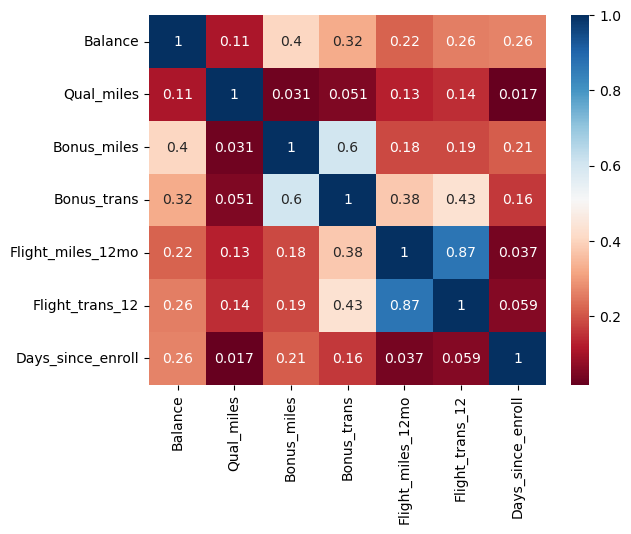

In [8]:
# Creating a heatmap that visualizes the correlation matrix of continuous variables in the DataFrame df.

sns.heatmap(df[continous_variables].corr(numeric_only=True), annot=True, cmap='RdBu')

<div class="alert alert-block alert-success"> 
    <strong>CORRELATION</strong>
    <ul>
    The highest correlation is 0.86193 between Flight_miles_12mo and Flight_trans_12, whereas the lowest is 0.017312 between Days_since_enroll and Qual_miles.
</ul>

</div>

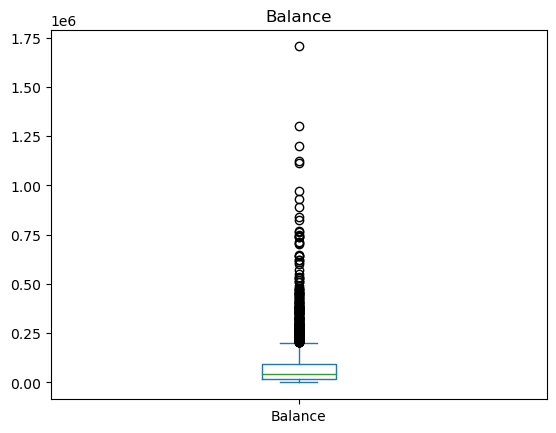

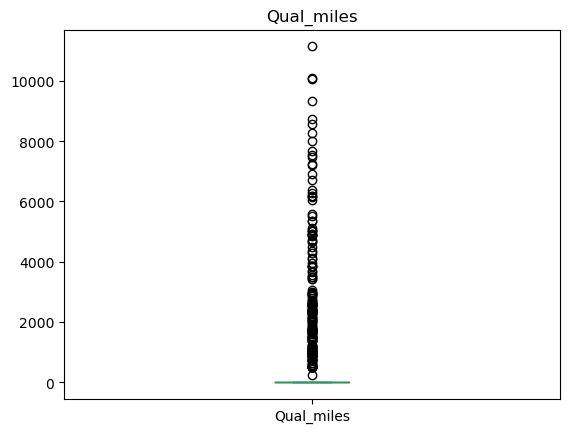

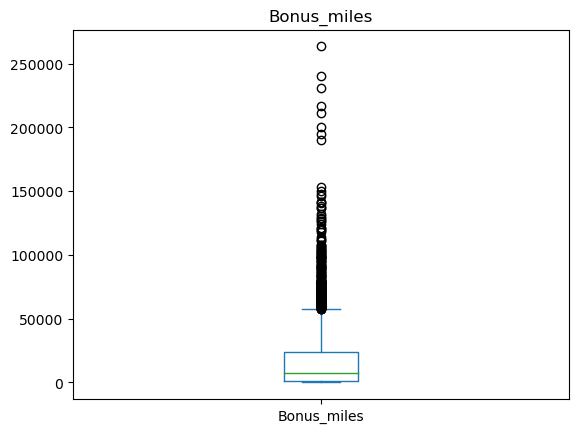

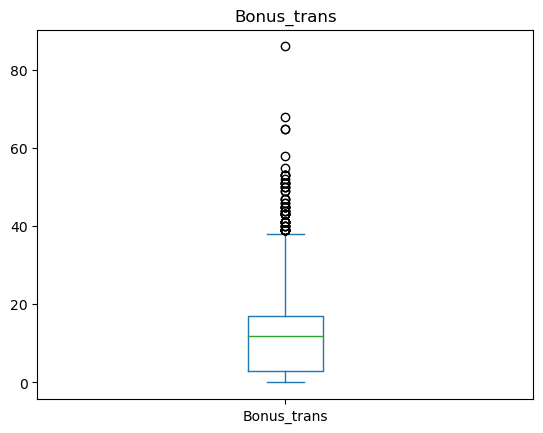

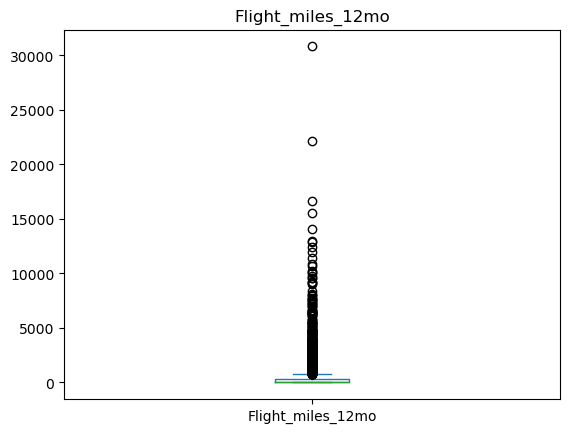

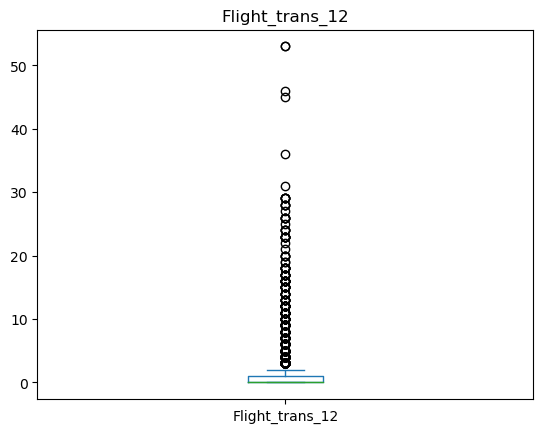

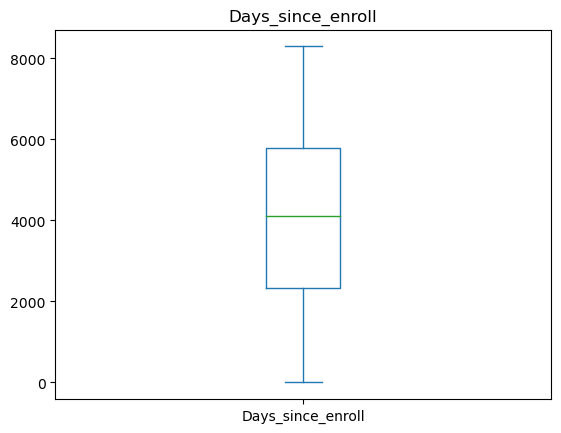

In [9]:
i = 0
for con_var in continous_variables:
    i+=1
    plt.figure(i)
    df[con_var].plot(kind = 'box', title = con_var)
plt.show()

<div class="alert alert-block alert-success"> 
    
We can say that for balance, qualifying miles, and bonus miles, a small number of passengers have much higher values than the typical passenger, which is indicative of heavy-tailed distributions in these variables. It suggests that there are passengers with very high engagement in the frequent-flyer program who might be the most responsive to such offers.  Also, while most passengers have lower values for the days since enrollment, flight transactions, flight miles, and bonus transactions, there are a notable number of outliers in each category. These outliers could represent frequent flyers or more engaged customers, which may be of particular interest when designing targeted offers or loyalty program strategies.
  

</div>

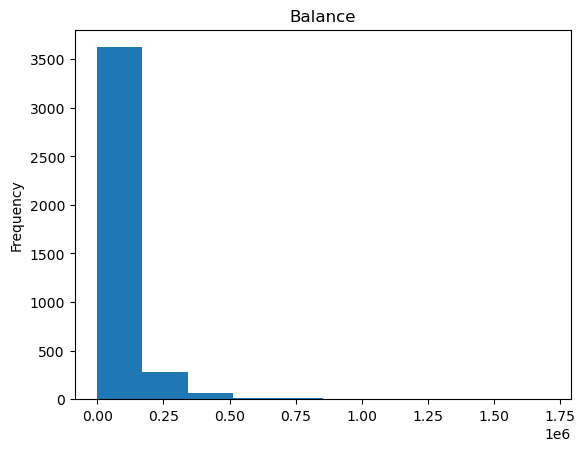

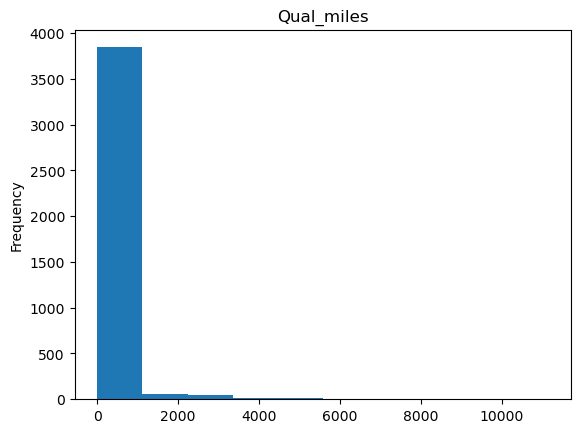

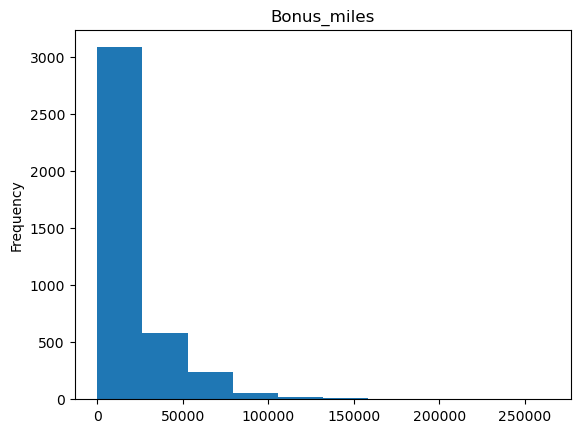

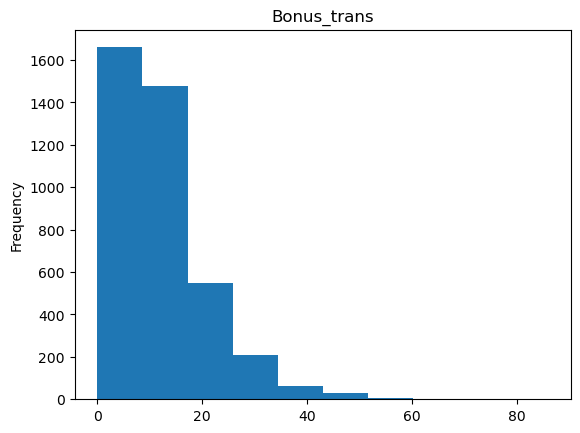

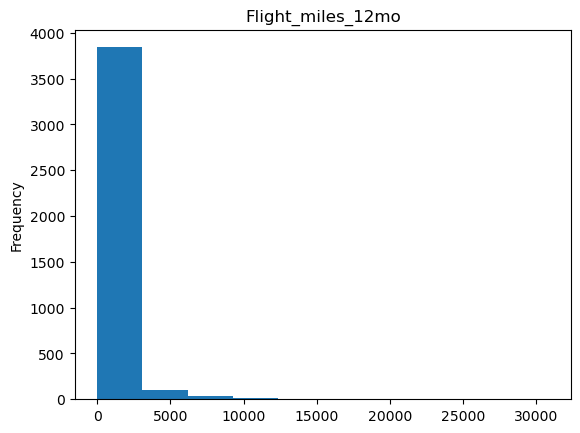

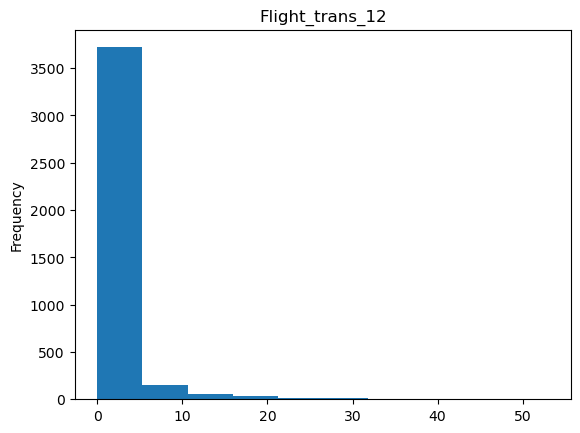

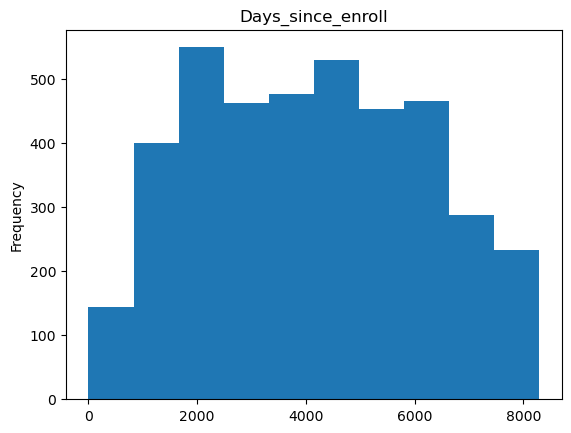

In [10]:
i = 0
for con_var in continous_variables:
    i+=1
    plt.figure(i)
    df[con_var].plot(kind = 'hist', title = con_var)
plt.show()

<div class="alert alert-block alert-success"> 
    
The overall patterns from these histograms highlight a customer base with generally low to moderate engagement in the airline's frequent-flyer program, with a smaller segment of highly active, possibly premium, passengers.  

</div>

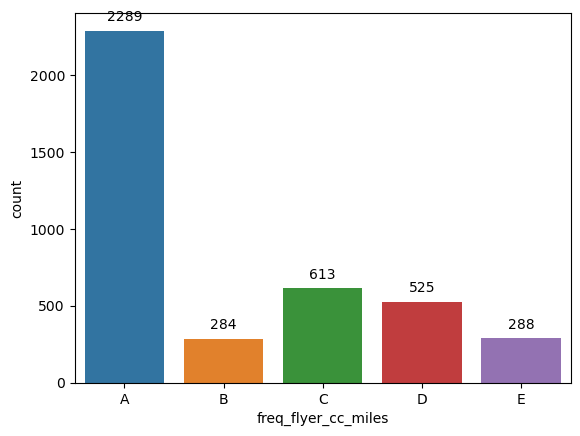

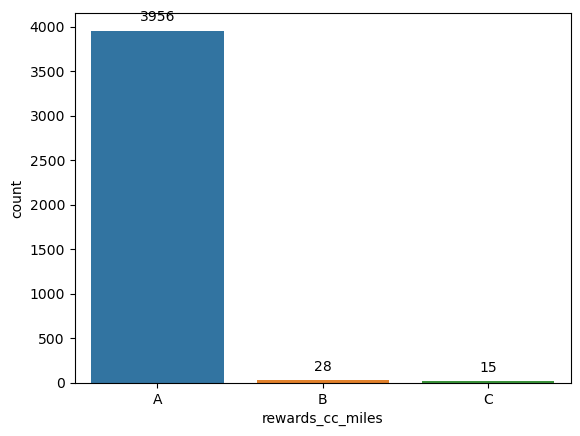

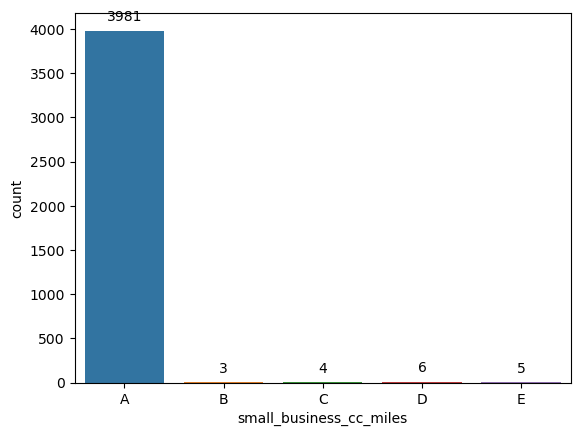

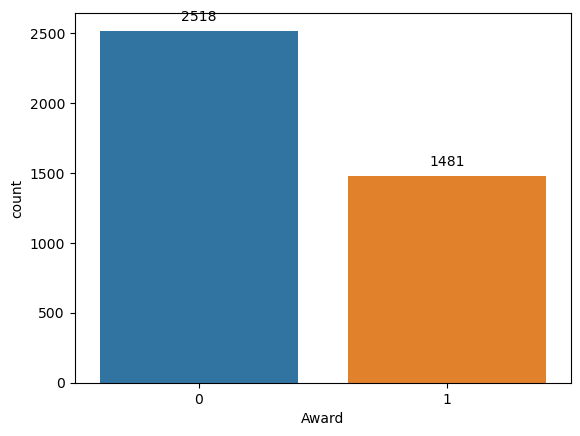

In [11]:
for i, cat_var in enumerate(categorical_variables, start=1):
    plt.figure(i)
    ax = sns.countplot(data=df, x=cat_var)
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

<div class="alert alert-block alert-success"> 
    
<strong>freq_flyer_cc_miles</strong>: Most passengers (2289) are in the lowest category 'A', with progressively fewer in higher mile categories, indicating that the vast majority earn under 5,000 miles from frequent flyer credit cards.

<strong>rewards_cc_miles</strong>: An overwhelming majority of passengers (3956) fall into category 'A', suggesting that rewards credit cards are either underused or that most passengers earn less than 5,000 miles through them.

<strong>small_business_cc_miles</strong>: Similar to other credit card mile categories, nearly all passengers (3981) are in the lowest category 'A', with negligible counts in higher mileage categories.

<strong>Award</strong>: There are more passengers without award travel (2518) than with (1481), which could point to underutilization of available award programs or potential for increasing engagement in the award system.
    
     OUTLIERS:  Data is extremely skewed for both categorical variables and continuous variables.
</div>

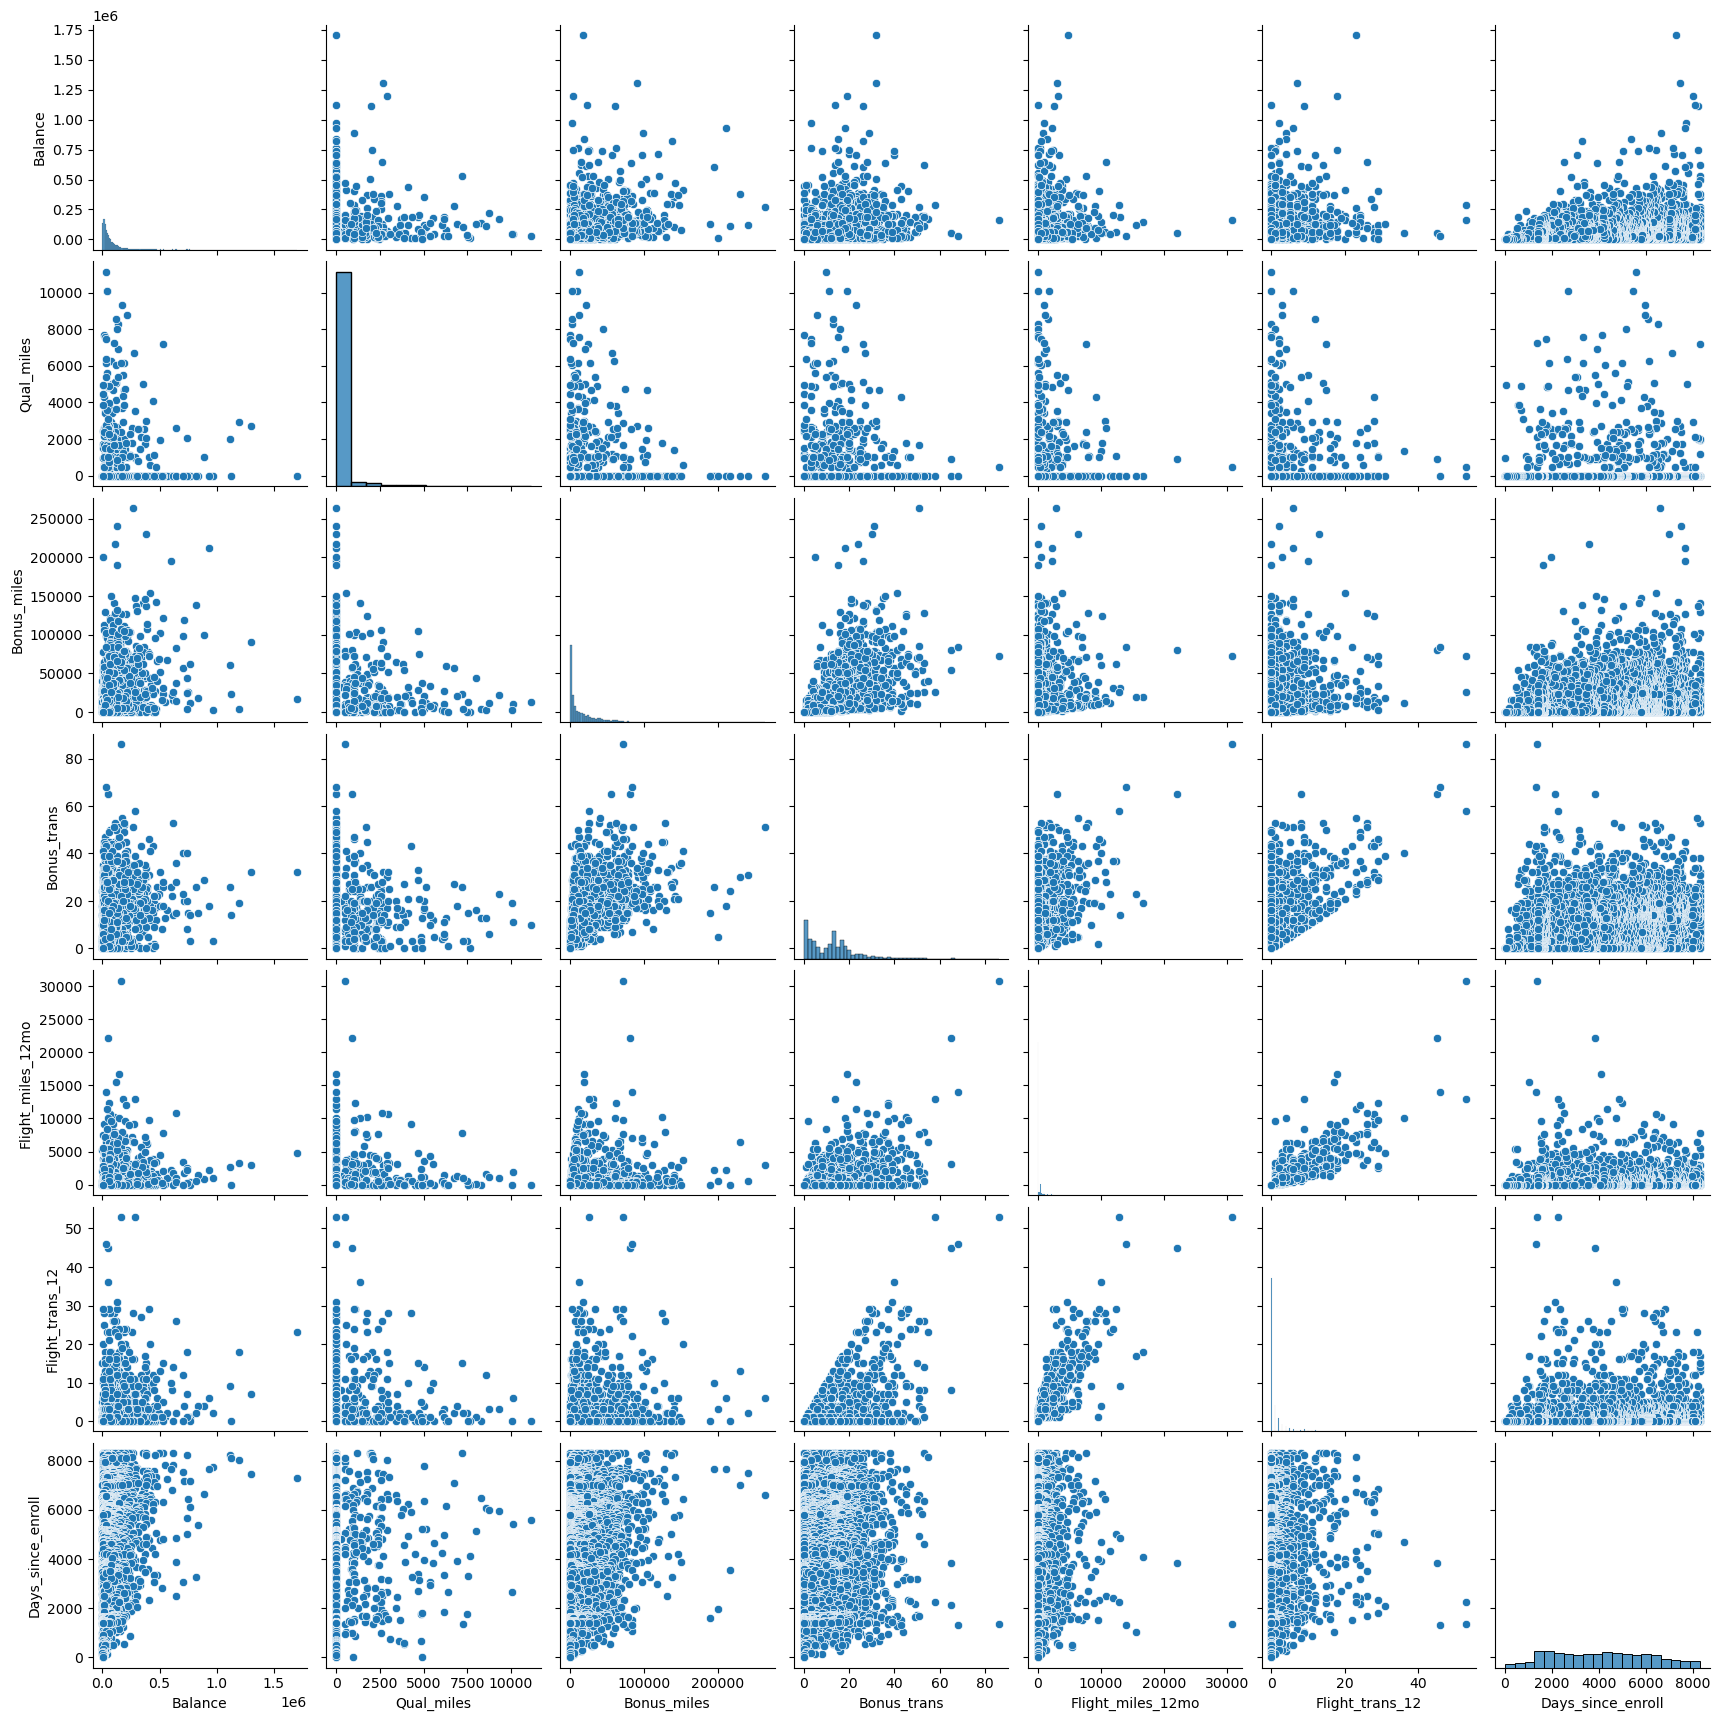

In [12]:
sns.pairplot(df[continous_variables])

<div class="alert alert-block alert-success"> 
<li><strong>Lower-End Clustering</strong>: A majority of passengers have lower balances, bonus miles, qualifying miles, and flight miles, with clustering at the lower ends of these variables.<br></li>
<li><strong>Positive Correlations</strong>: There are positive correlations between bonus miles and bonus transactions, as well as between flight miles and flight transactions, indicating that passengers who transact more, either through flights or bonus programs, tend to accumulate more miles.</li>

<li><strong>Sparse High-Value Outliers</strong>: There are sparse outliers with high balances and miles, suggesting the presence of a few highly engaged passengers.</li>

<li><strong>No Tenure Correlation</strong>: There is no discernible pattern between days since enrollment and other variables, suggesting that the length of membership does not necessarily correlate with higher balances or increased transaction activity.<br></li>

These patterns indicate a predominantly low-engagement customer base with opportunities to increase loyalty program participation, as well as a small segment of highly active members who could be targeted for retention and upselling efforts.





</div>

In [13]:
fig = px.scatter_matrix(df, dimensions=['Balance','Qual_miles', 'Bonus_miles'],
                        color='freq_flyer_cc_miles',
                        size='Days_since_enroll')
fig.update_traces(diagonal_visible=False,showupperhalf=False)
fig.show()

In [14]:
fig = px.scatter_matrix(df, dimensions=['Balance','Flight_miles_12mo', 'Flight_trans_12'],
                        color='freq_flyer_cc_miles',
                        size='Days_since_enroll')
fig.update_traces(diagonal_visible=False,showupperhalf=False)
fig.show()

### Creating new proxy variables for categorical ones

In [15]:
df['freq_flyer_cc_miles_min'] = 0
df['freq_flyer_cc_miles_min'] = np.where(df['freq_flyer_cc_miles'] == 'B', 5000, df['freq_flyer_cc_miles_min'])
df['freq_flyer_cc_miles_min'] = np.where(df['freq_flyer_cc_miles'] == 'C', 10000, df['freq_flyer_cc_miles_min'])
df['freq_flyer_cc_miles_min'] = np.where(df['freq_flyer_cc_miles'] == 'D', 25000, df['freq_flyer_cc_miles_min'])
df['freq_flyer_cc_miles_min'] = np.where(df['freq_flyer_cc_miles'] == 'E', 50000, df['freq_flyer_cc_miles_min'])

df['rewards_cc_miles_min'] = 0
df['rewards_cc_miles_min'] = np.where(df['rewards_cc_miles'] == 'B', 5000, df['rewards_cc_miles_min'])
df['rewards_cc_miles_min'] = np.where(df['rewards_cc_miles'] == 'C', 10000, df['rewards_cc_miles_min'])
df['rewards_cc_miles_min'] = np.where(df['rewards_cc_miles'] == 'D', 25000, df['rewards_cc_miles_min'])
df['rewards_cc_miles_min'] = np.where(df['rewards_cc_miles'] == 'E', 50000, df['rewards_cc_miles_min'])

df['small_business_cc_miles_min'] = 0
df['small_business_cc_miles_min'] = np.where(df['small_business_cc_miles'] == 'B', 5000, df['small_business_cc_miles_min'])
df['small_business_cc_miles_min'] = np.where(df['small_business_cc_miles'] == 'C', 10000, df['small_business_cc_miles_min'])
df['small_business_cc_miles_min'] = np.where(df['small_business_cc_miles'] == 'D', 25000, df['small_business_cc_miles_min'])
df['small_business_cc_miles_min'] = np.where(df['small_business_cc_miles'] == 'E', 50000, df['small_business_cc_miles_min'])

<div class="alert alert-block alert-warning"> <b>The above step encodes the categorical mileage bands into numeric variables that reflect at least how many miles a passenger has based on the credit card mileage category they belong to. </b></div>

In [16]:
continous_variables = continous_variables+ ['ID#','freq_flyer_cc_miles_min','rewards_cc_miles_min','small_business_cc_miles_min']

In [17]:
df.head()

ID#  Balance  Qual_miles freq_flyer_cc_miles rewards_cc_miles  \
0    1    28143           0                   A                A   
1    2    19244           0                   A                A   
2    3    41354           0                   A                A   
3    4    14776           0                   A                A   
4    5    97752           0                   D                A   

  small_business_cc_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0                       A          174            1                  0   
1                       A          215            2                  0   
2                       A         4123            4                  0   
3                       A          500            1                  0   
4                       A        43300           26               2077   

   Flight_trans_12  Days_since_enroll Award  freq_flyer_cc_miles_min  \
0                0               7000     0                        0   
1                0               6968     0                        0   
2                0               7034     0                        0   
3                0               6952     0                        0   
4                4               6935     1                    25000   

   rewards_cc_miles_min  small_business_cc_miles_min  
0                     0                            0  
1                     0                            0  
2                     0                            0  
3                     0                            0  
4                     0                            0

In [18]:
df_temp = df[continous_variables]
df_temp.set_index('ID#',inplace = True)
df_temp = df_temp.apply(lambda x: x.astype('float64'))

df_Norm = (df_temp - df_temp.mean()) / df_temp.std()

In [19]:
df_Norm

Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
ID#                                                                       
1    -0.451084   -0.186275    -0.702698    -1.103926          -0.328562   
2    -0.539389   -0.186275    -0.701001    -0.999801          -0.328562   
3    -0.319991   -0.186275    -0.539185    -0.791550          -0.328562   
4    -0.583726   -0.186275    -0.689200    -1.103926          -0.328562   
5     0.239648   -0.186275     1.082986     1.499207           1.154788   
...        ...         ...          ...          ...                ...   
4017 -0.547010   -0.186275    -0.356915    -0.791550          -0.185726   
4018 -0.091454   -0.186275    -0.669284    -0.687425          -0.328562   
4019 -0.000043   -0.186275     0.343761    -0.375049          -0.328562   
4020 -0.185584   -0.186275    -0.689200    -1.103926           0.028527   
4021 -0.700420   -0.186275    -0.709903    -1.208052          -0.328562   

      Flight_trans_12  Days_since_enroll  freq_flyer_cc_miles_min  \
ID#                                                                 
1           -0.362123           1.395280                -0.616630   
2           -0.362123           1.379784                -0.616630   
3           -0.362123           1.411744                -0.616630   
4           -0.362123           1.372037                -0.616630   
5            0.692404           1.363805                 1.140963   
...               ...                ...                      ...   
4017        -0.098491          -1.314955                -0.616630   
4018        -0.362123          -1.318829                -0.616630   
4019        -0.362123          -1.315439                 0.086407   
4020        -0.098491          -1.315924                -0.616630   
4021        -0.362123          -1.317376                -0.616630   

      rewards_cc_miles_min  small_business_cc_miles_min  
ID#                                                      
1                 -0.09823                    -0.055715  
2                 -0.09823                    -0.055715  
3                 -0.09823                    -0.055715  
4                 -0.09823                    -0.055715  
5                 -0.09823                    -0.055715  
...                    ...                          ...  
4017              -0.09823                    -0.055715  
4018              -0.09823                    -0.055715  
4019              -0.09823                    -0.055715  
4020              -0.09823                    -0.055715  
4021              -0.09823                    -0.055715  

[3999 rows x 10 columns]

<div class="alert alert-block alert-success"> <b>Feature Scaling: </b>
    <BR> 
Algorithms that compute distances between data points, such as k-nearest neighbors (k-NN) and k-means clustering, are affected by the scale of the variables. If one feature has a broad range of values, the distance will be governed by this particular feature, which may not be desirable.
<BR>
        
</div>

In [20]:
distanceNorm = pairwise.pairwise_distances(df_Norm,metric='euclidean')


pd.DataFrame(distanceNorm, columns=df_temp.index, index=df_temp.index).head(5)

ID#      1         2         3         4         5         6         7     \
ID#                                                                         
1    0.000000  0.137415  0.376526  0.135337  4.104212  0.158792  2.887073   
2    0.137415  0.000000  0.344543  0.114049  4.054169  0.210693  2.815887   
3    0.376526  0.344543  0.000000  0.437282  3.820469  0.515577  2.529491   
4    0.135337  0.114049  0.437282  0.000000  4.122674  0.107519  2.910720   
5    4.104212  4.054169  3.820469  4.122674  0.000000  4.194823  2.209367   

ID#      8          9         10    ...      4012      4013      4014  \
ID#                                 ...                                 
1    0.499263  10.000517  3.412813  ...  2.771560  2.721885  4.014748   
2    0.434372   9.992224  3.348155  ...  2.731867  2.700328  3.935085   
3    0.383524   9.814276  3.074345  ...  2.762975  2.748214  3.789934   
4    0.491251  10.055735  3.440120  ...  2.739542  2.692840  4.002880   
5    3.705292   8.418060  1.430923  ...  4.666935  4.801528  3.652916   

ID#      4015      4016      4017      4018      4019      4020      4021  
ID#                                                                        
1    2.945518  2.731681  2.767964  2.769533  3.109990  2.760129  2.726090  
2    2.888368  2.703910  2.741049  2.753497  3.087269  2.756813  2.709992  
3    2.867988  2.761047  2.758541  2.745182  2.997870  2.788428  2.792032  
4    2.919418  2.700081  2.742110  2.767121  3.107369  2.753300  2.694036  
5    4.416772  4.832671  4.541706  4.643215  3.964786  4.718244  5.001764  

[5 rows x 3999 columns]

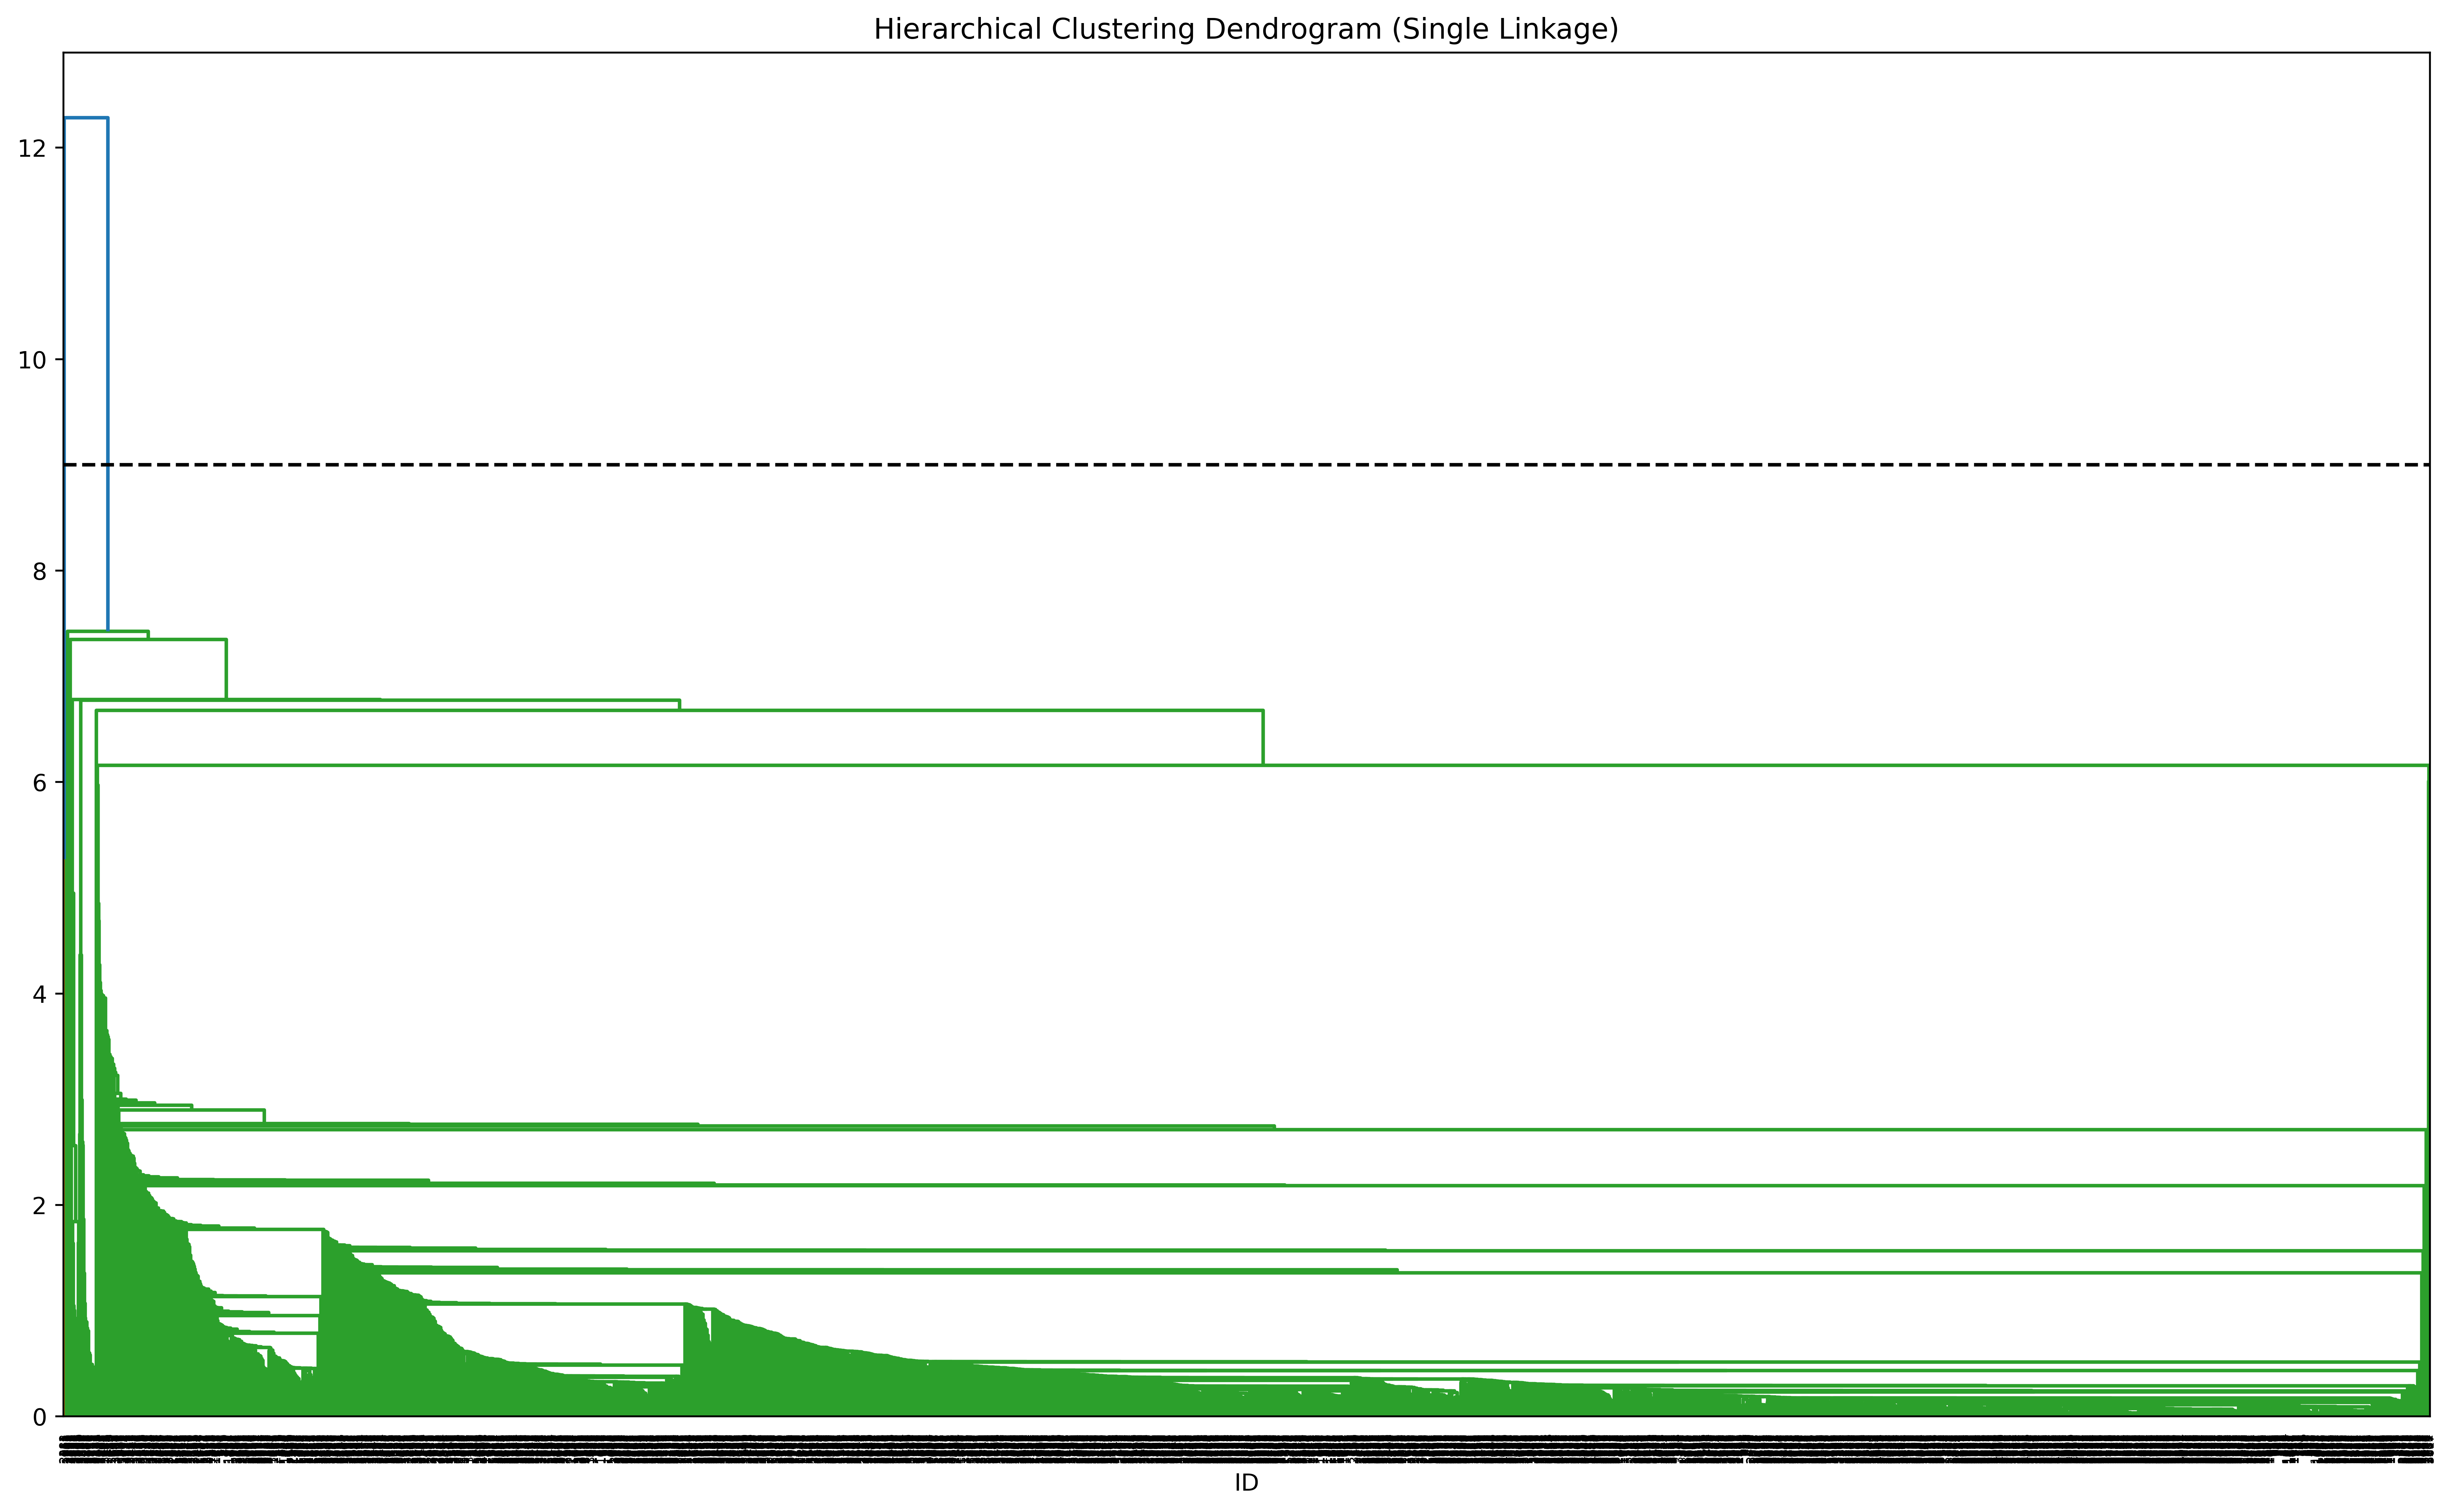

In [21]:
# Single Linkage
Z = linkage(df_Norm, method='single')

fig = plt.figure(figsize=(18, 12), dpi=500)
fig.subplots_adjust(bottom=0.21)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('ID')
dendrogram(Z, labels=df_Norm.index, color_threshold=9)
plt.axhline(y=9, color='black', linewidth=1.5, linestyle='dashed')
plt.show()

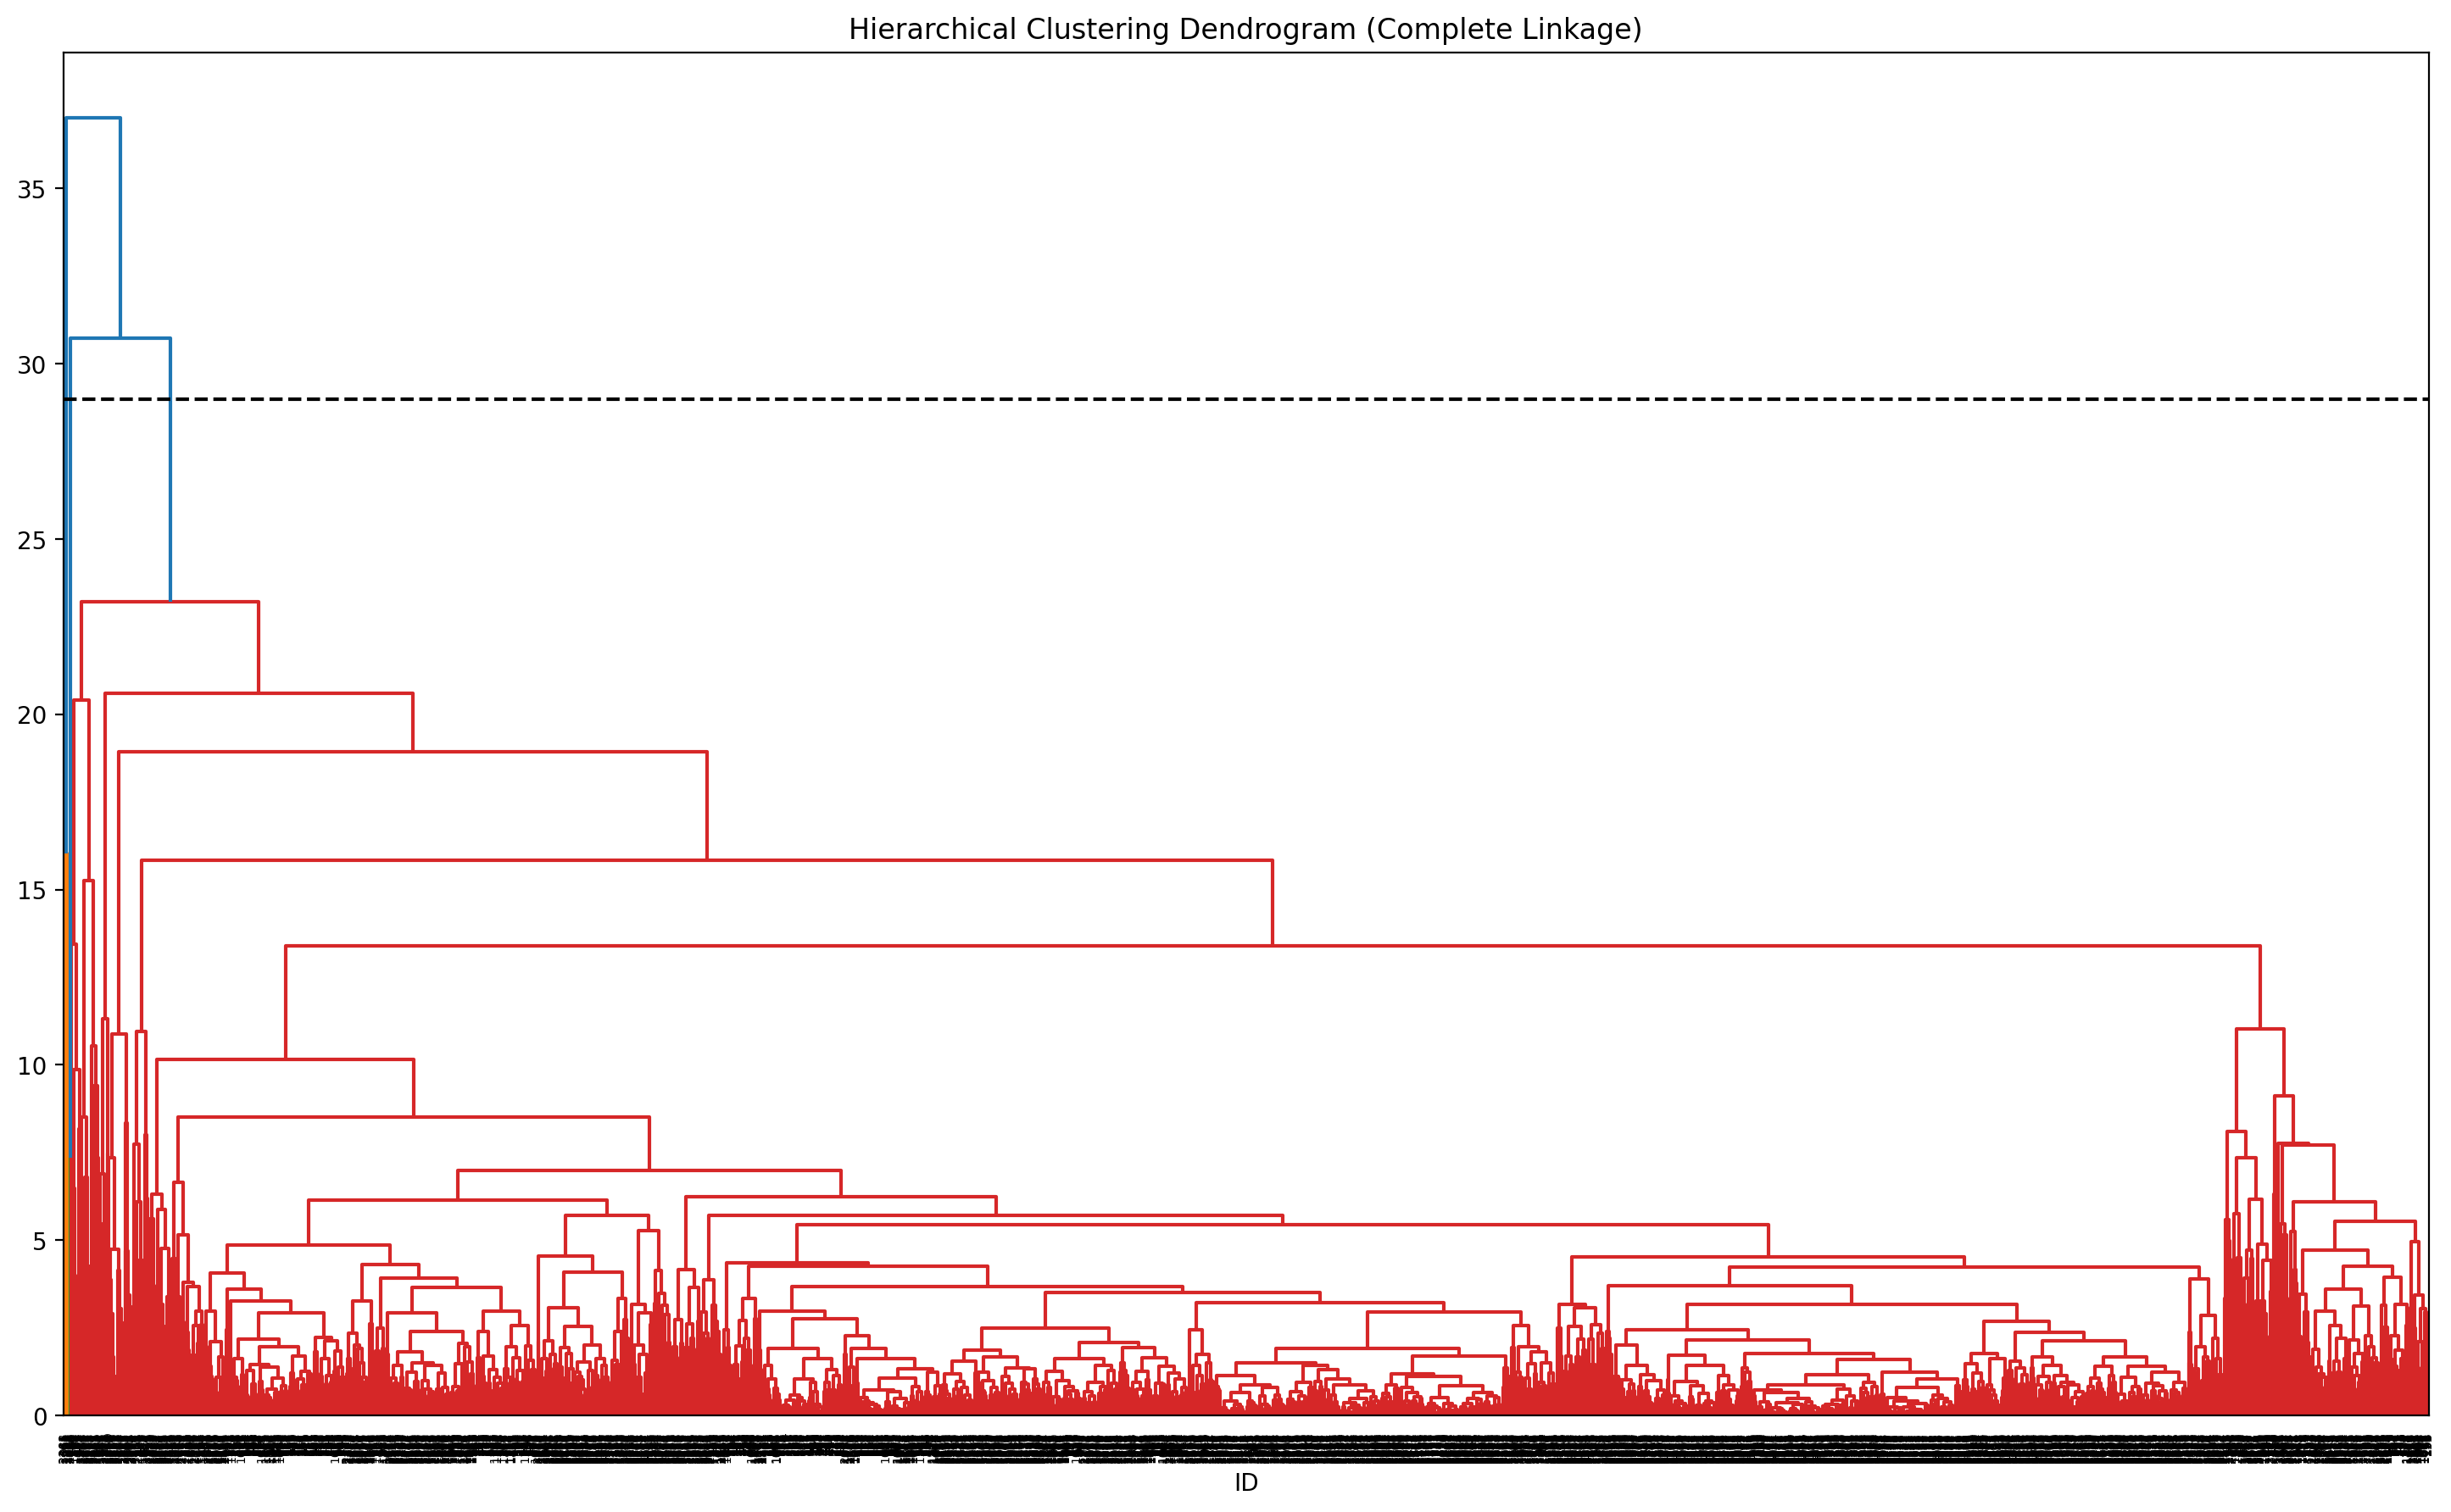

In [22]:
# Complete Linkage
Z = linkage(df_Norm, method='complete')

fig = plt.figure(figsize=(18, 12), dpi=200)
fig.subplots_adjust(bottom=0.21)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('ID')
dendrogram(Z, labels=df_Norm.index, color_threshold=29.0)
plt.axhline(y=29.0, color='black', linewidth=1.5, linestyle='dashed')
plt.show()

<div class="alert alert-block alert-success"> <b>Difference between Single Linkage and at least another distance measurement method: </b>

<strong>Single Linkage</strong> is a Hierarchical Agglomerative clustering method where clusters are merged based on the minimum distance between members of clusters. While <strong>Complete Linkage</strong> is the method where clusters are merged based on the maximum distance between members of two clusters, for example.
        <br>Based on the visuals, <strong>Single Linkage</strong> clustering produces long thin clusters in which neighboring points of the same cluster have small distances, but points at opposing ends of a cluster may be much farther from each other than two points of other clusters. It is based on sorting clusters in a bottom-up approach, where at each step combining two clusters that contain the closest pair of elements that have yet to belong to the same cluster.<br>
<br><strong>Complete Linkage</strong> tends to produce highly compact clusters, where each data point begins as its own cluster and is successively combined into larger clusters until all elements end up being in the same cluster. A disadvantage of Complete Linkage clustering in comparison to Single Linkage is that it behaves poorly when outliers are present.
<BR>
    
<b>In single linkage clustering, the threshold is set at 9, while for complete linkage clustering, it is set to 29. These thresholds correspond to the points where the clusters reach their maximum vertical height. Single linkage clustering results in two categories, whereas complete linkage clustering yields three categories.</b>
</div>

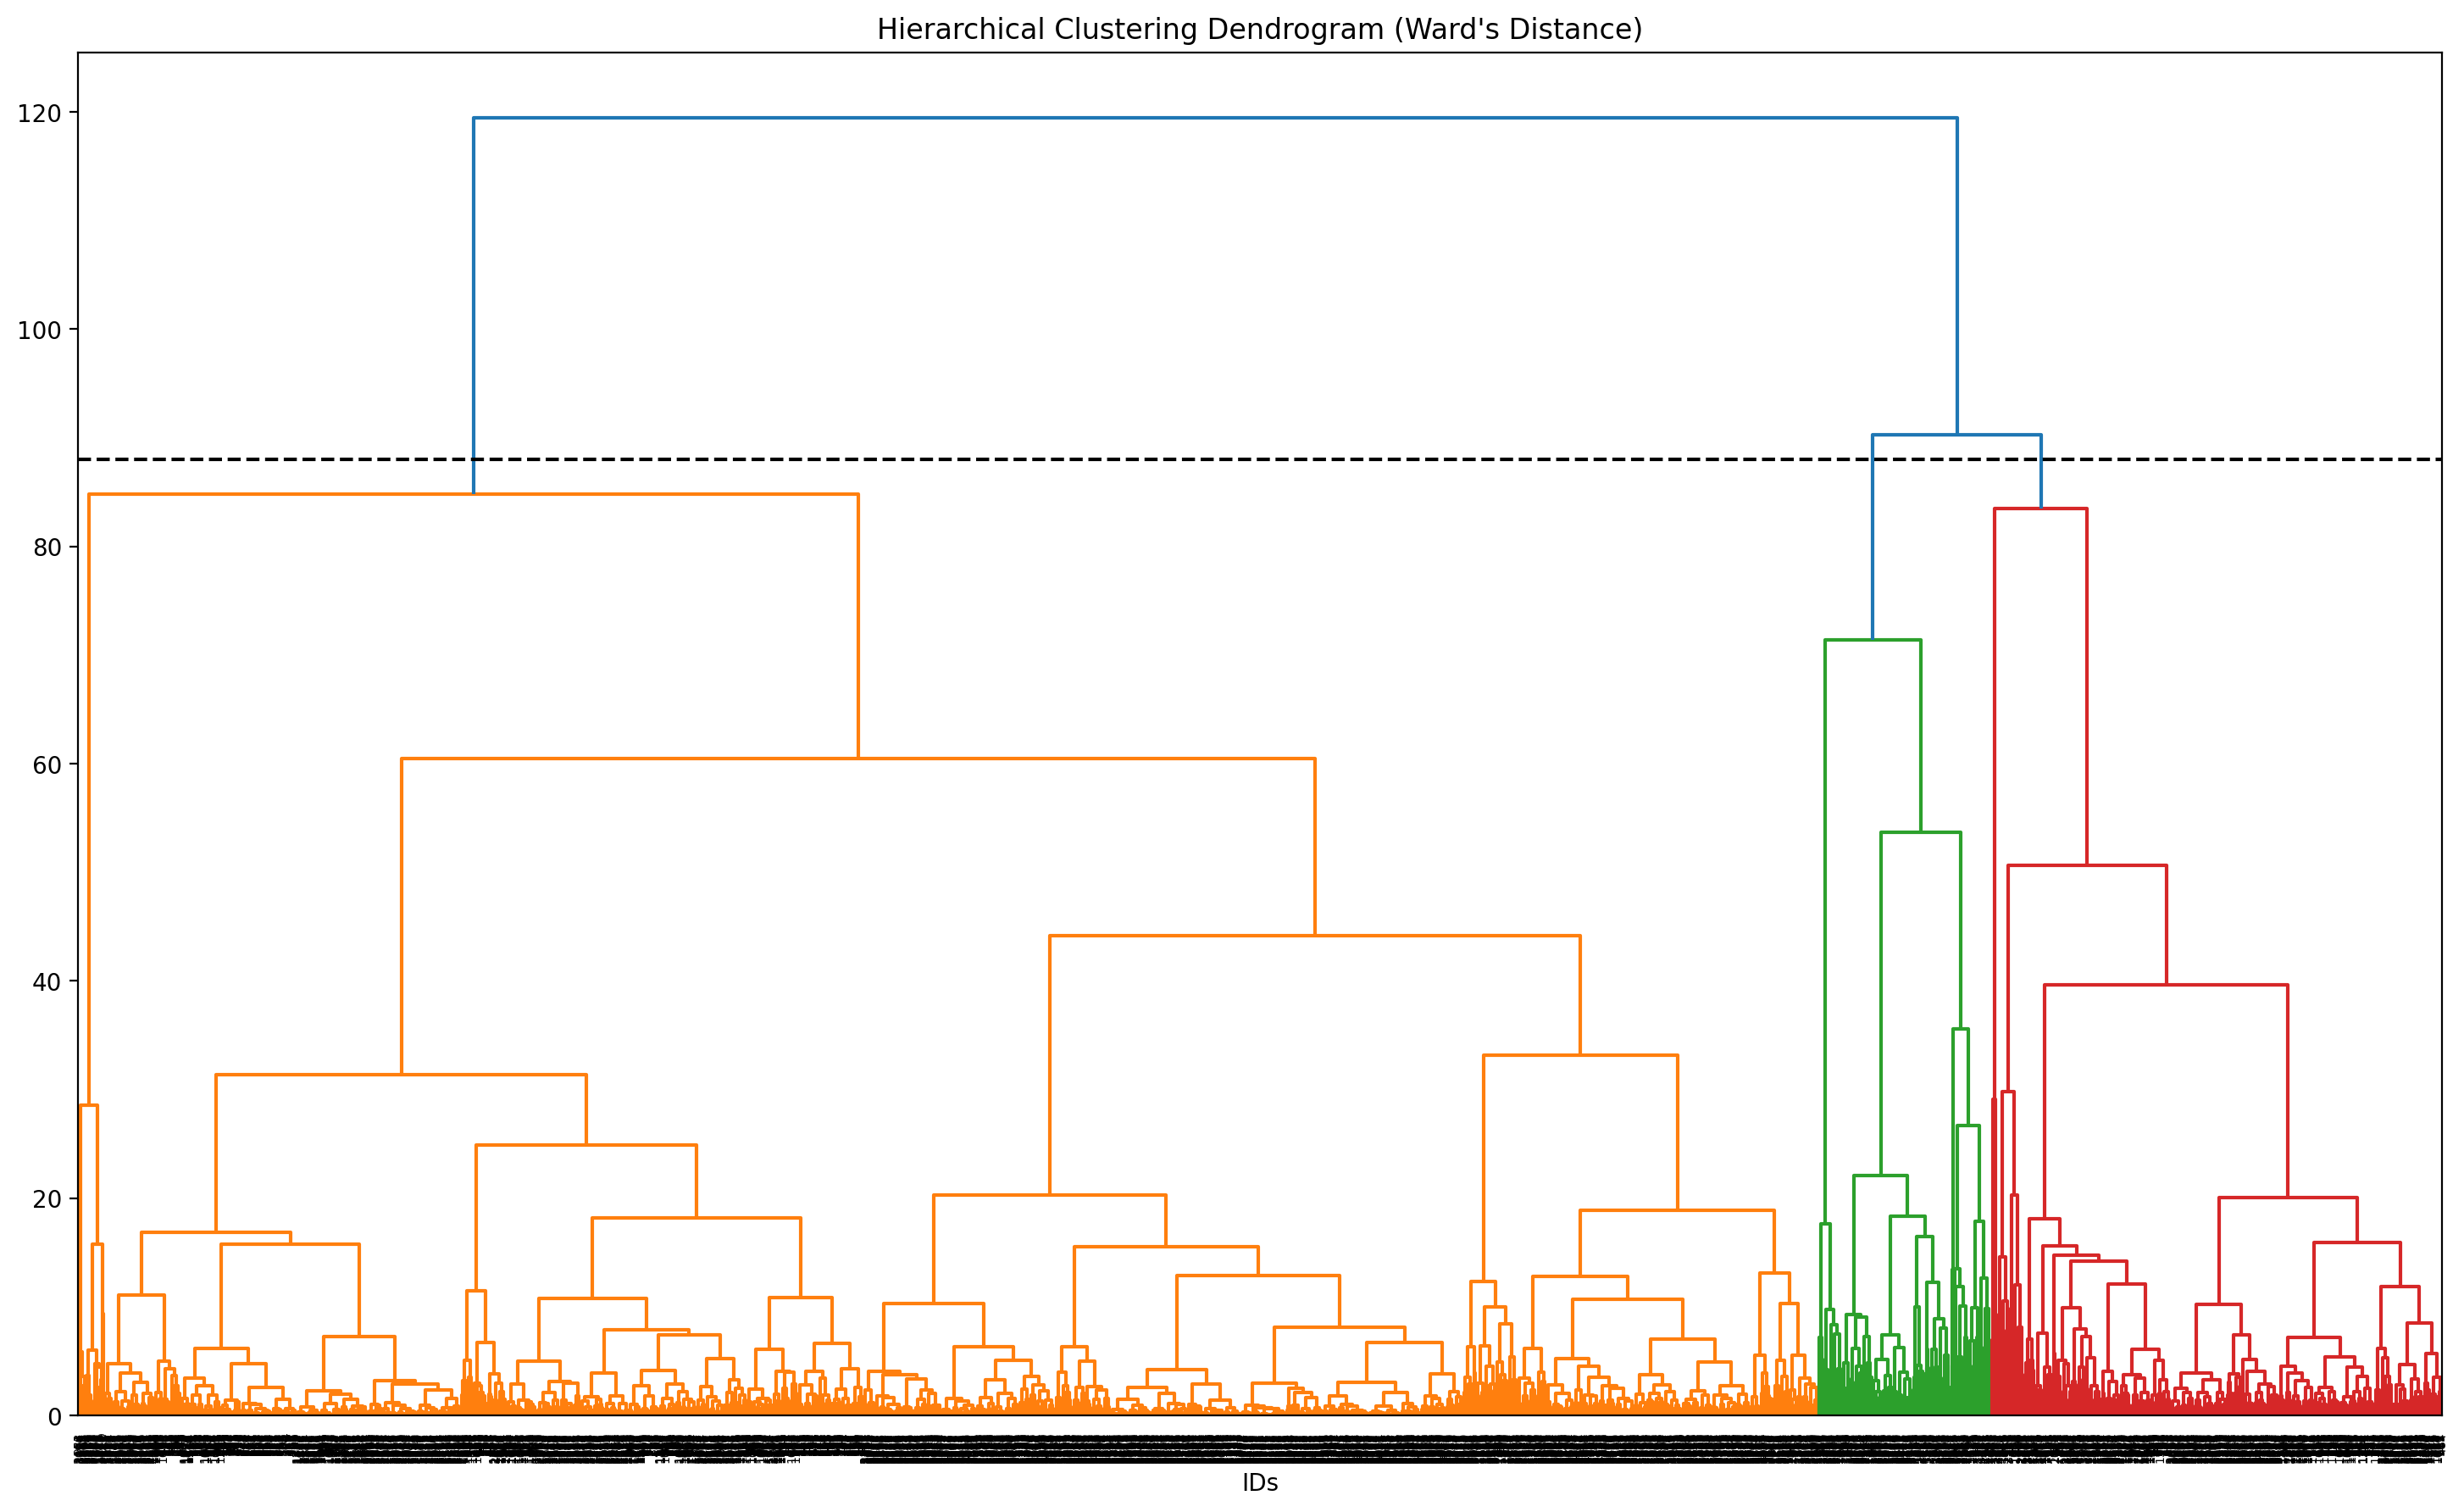

In [23]:
# Ward linkage
Z = linkage(df_Norm, method='ward')

fig = plt.figure(figsize=(18, 12), dpi=200)
fig.subplots_adjust(bottom=0.21)
plt.title("Hierarchical Clustering Dendrogram (Ward's Distance)")
plt.xlabel('IDs')
dendrogram(Z, labels=df_Norm.index, color_threshold=88.0)
plt.axhline(y=88.0, color='black', linewidth=1.5, linestyle='dashed')
plt.show()

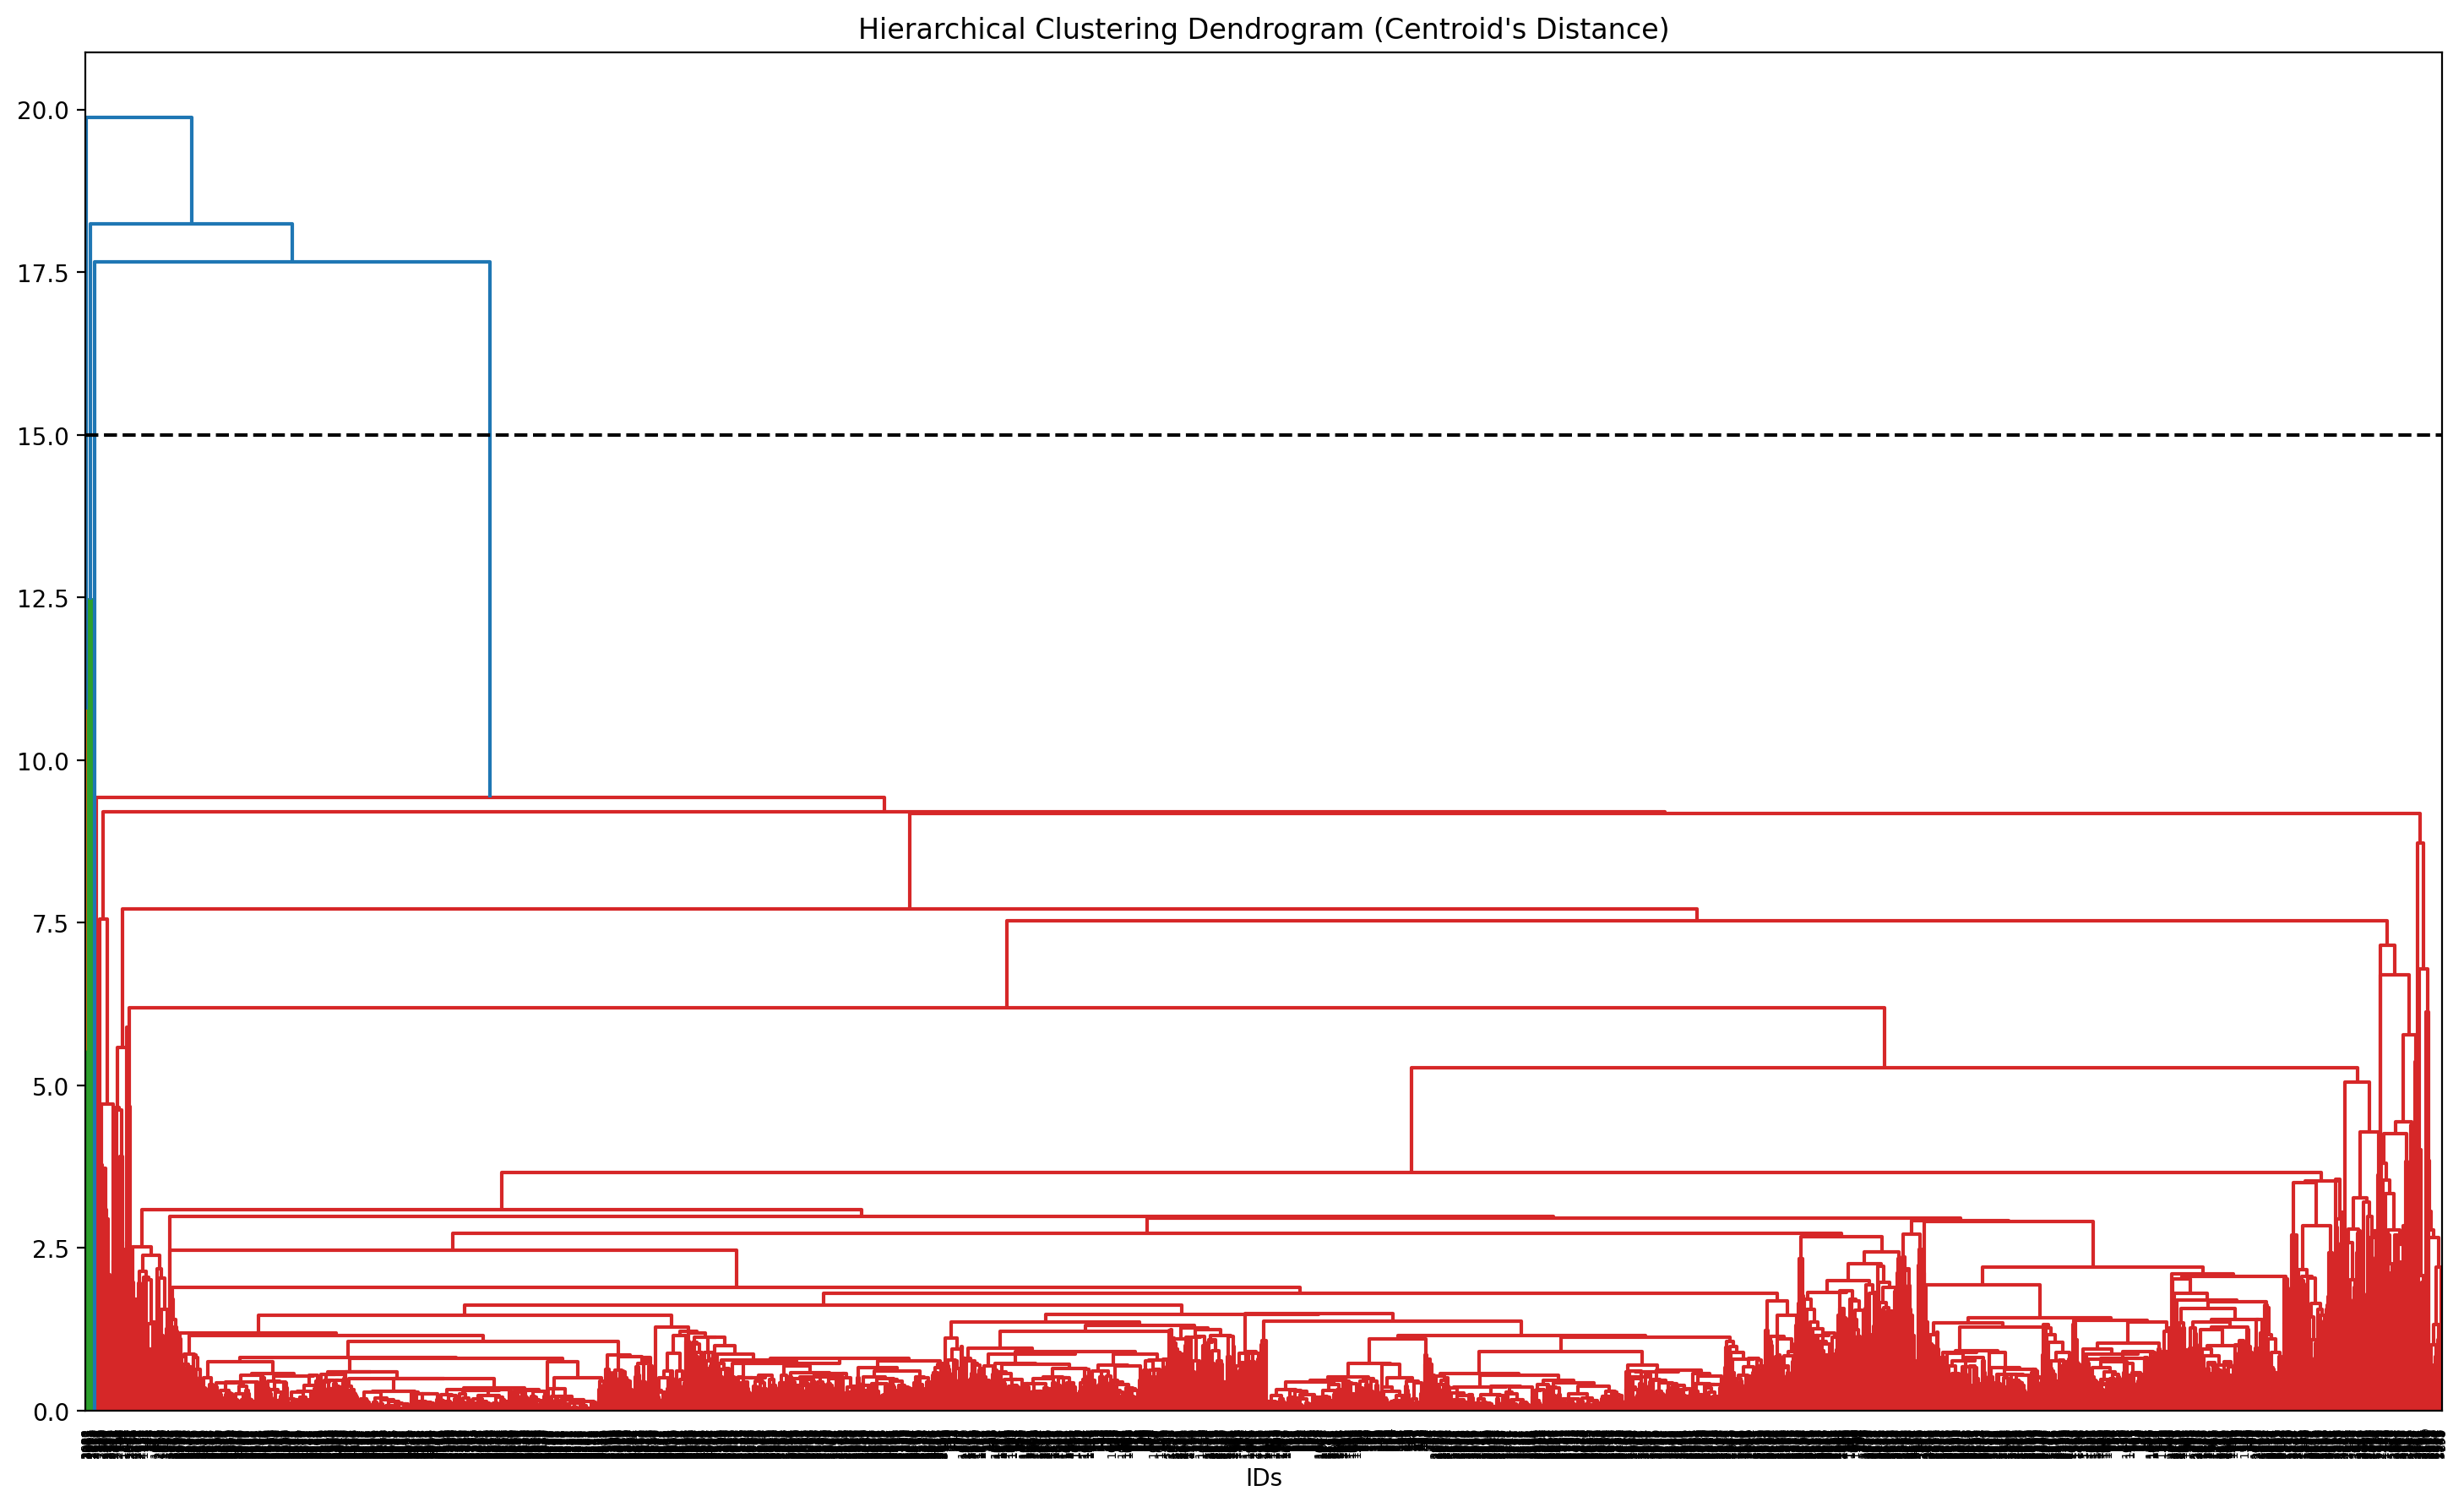

In [24]:
# Centroid linkage
Z = linkage(df_Norm, method='centroid')

fig = plt.figure(figsize=(18, 12), dpi=200)
fig.subplots_adjust(bottom=0.21)
plt.title("Hierarchical Clustering Dendrogram (Centroid's Distance)")
plt.xlabel('IDs')
dendrogram(Z, labels=df_Norm.index, color_threshold=15.0)
plt.axhline(y=15.0, color='black', linewidth=1.5, linestyle='dashed')
plt.show()

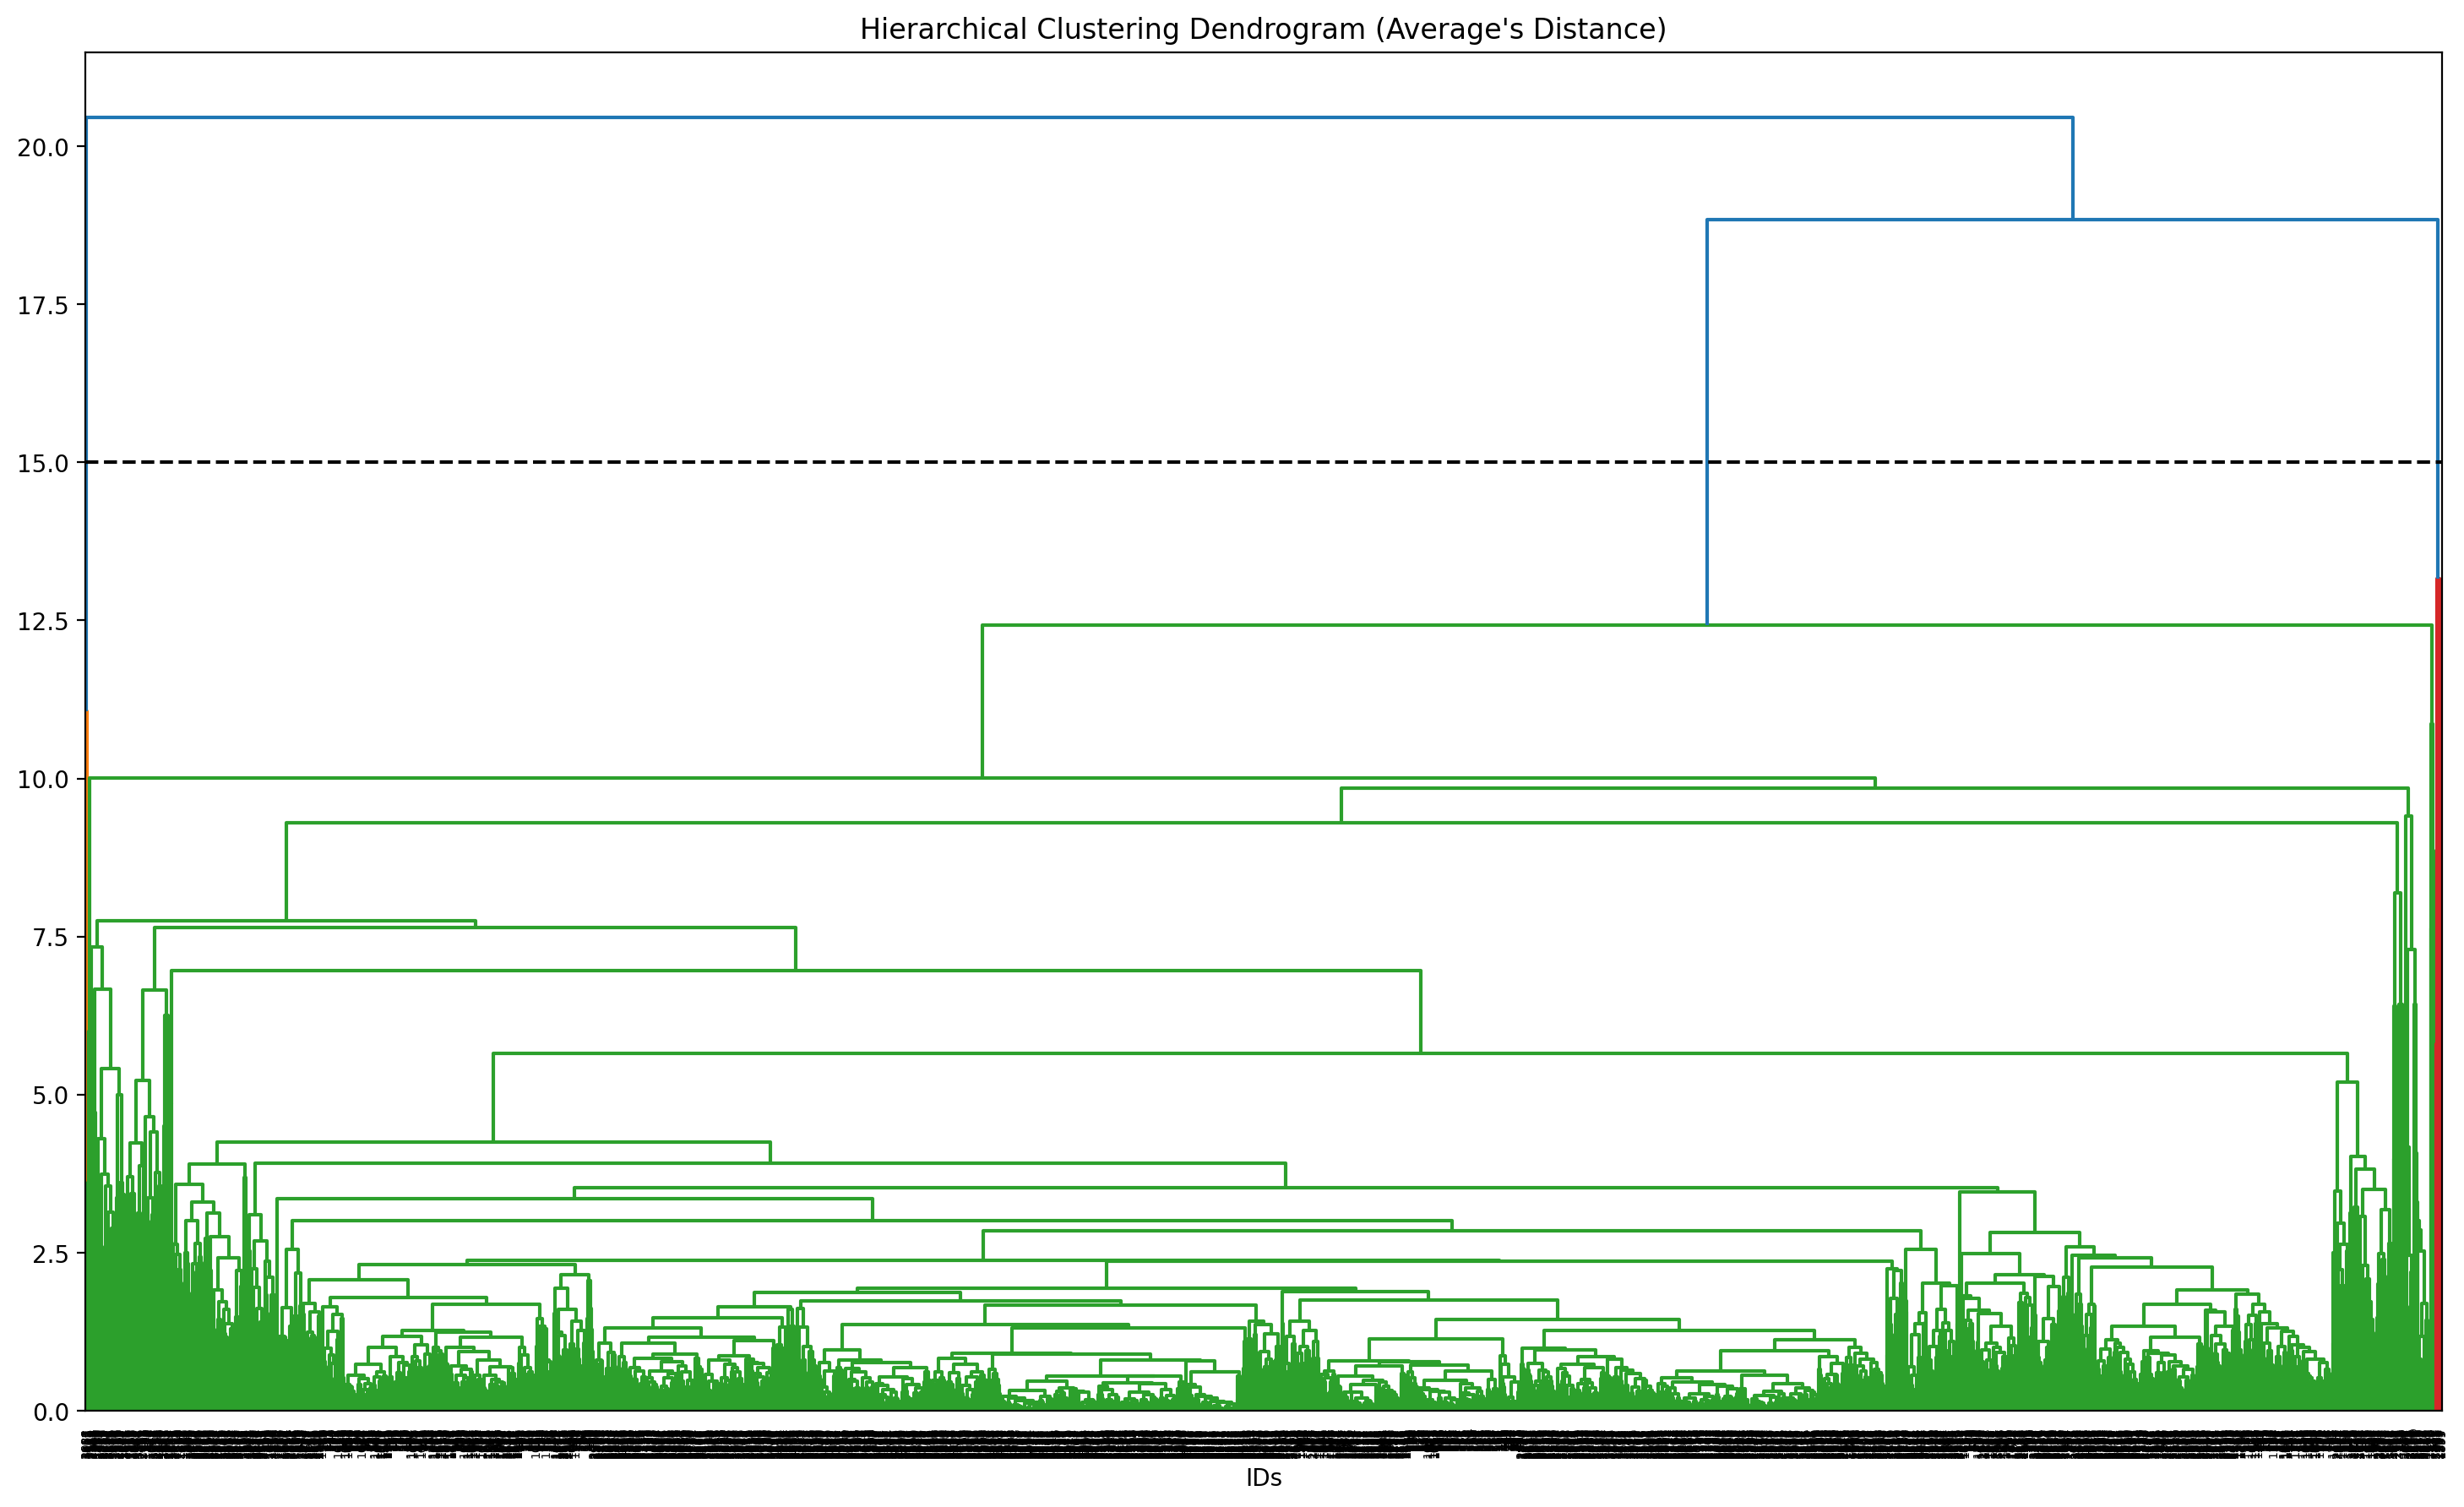

In [25]:
# Average linkage
Z = linkage(df_Norm, method='average')

fig = plt.figure(figsize=(18, 12), dpi=200)
fig.subplots_adjust(bottom=0.21)
plt.title("Hierarchical Clustering Dendrogram (Average's Distance)")
plt.xlabel('IDs')
dendrogram(Z, labels=df_Norm.index, color_threshold=15.0)
plt.axhline(y=15.0, color='black', linewidth=1.5, linestyle='dashed')
plt.show()

In [26]:
memb = fcluster(linkage(df_Norm, 'ward'), 3, criterion='maxclust')
memb = pd.Series(memb, index=df_Norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(map(str,item.index)))

1 :  1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 18, 19, 20, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 37, 38, 39, 40, 41, 44, 45, 47, 48, 49, 50, 52, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 67, 69, 71, 74, 75, 76, 78, 79, 83, 84, 85, 86, 87, 89, 91, 92, 93, 94, 96, 98, 99, 101, 102, 104, 105, 106, 107, 110, 113, 116, 117, 118, 119, 121, 122, 123, 126, 131, 133, 134, 135, 136, 137, 141, 142, 143, 144, 145, 147, 148, 149, 151, 152, 156, 159, 160, 162, 163, 165, 167, 168, 169, 174, 175, 176, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 191, 193, 197, 198, 199, 201, 202, 206, 208, 209, 211, 212, 213, 215, 216, 217, 218, 220, 221, 222, 226, 227, 228, 229, 230, 232, 234, 236, 237, 238, 239, 240, 241, 243, 245, 250, 251, 253, 254, 255, 256, 257, 258, 261, 262, 264, 265, 266, 267, 268, 269, 270, 271, 274, 277, 278, 280, 281, 282, 284, 286, 287, 291, 297, 298, 301, 303, 304, 305, 308, 310, 312, 313, 318, 319, 320, 321, 323, 324, 325, 328, 329, 330, 333, 335, 337, 338, 341, 342, 343, 344

<div class="alert alert-block alert-danger"> <br>08)</b> Analyze the clusters and their centroids, using cluster summary, and parallel coord plots. (5%)</div>


In [27]:
df['clusterH'] = list(memb)
clusterSummaryH = df.groupby(['clusterH']).agg({'Balance': ['count'],
                                               'Balance': ['mean'],
                                               'Qual_miles': ['mean'],
                                               'Bonus_miles': ['mean'],
                                               'Bonus_trans': ['mean'],
                                               'Flight_miles_12mo': ['mean'],
                                               'Flight_trans_12': ['mean'],
                                               'Days_since_enroll': ['mean'],
                                               'freq_flyer_cc_miles': pd.Series.mode,
                                                'freq_flyer_cc_miles_min': ['mean'],
                                                'rewards_cc_miles': pd.Series.mode,
                                                'rewards_cc_miles_min': ['mean'],
                                                'small_business_cc_miles': pd.Series.mode,
                                                'small_business_cc_miles_min': ['mean']
                                                })
clusterSummaryH

Balance   Qual_miles   Bonus_miles Bonus_trans  \
                   mean         mean          mean        mean   
clusterH                                                         
1          50886.554688    60.718071   7143.083560    8.650815   
2         116840.744027  1149.276451  23964.774744   20.989761   
3         144734.060367    79.818898  53164.465879   19.393701   

         Flight_miles_12mo Flight_trans_12 Days_since_enroll  \
                      mean            mean              mean   
clusterH                                                       
1               152.609375        0.511209       3901.432405   
2              3825.638225       10.740614       4136.378840   
3               353.765092        1.103675       4950.581365   

         freq_flyer_cc_miles freq_flyer_cc_miles_min rewards_cc_miles  \
                        mode                    mean             mode   
clusterH                                                                
1                          A             2472.826087                A   
2                          A             8737.201365                A   
3                          D            33116.797900                A   

         rewards_cc_miles_min small_business_cc_miles  \
                         mean                    mode   
clusterH                                                
1                   98.505435                       A   
2                    0.000000                       A   
3                    0.000000                       A   

         small_business_cc_miles_min  
                                mean  
clusterH                              
1                           1.698370  
2                           0.000000  
3                         590.551181

### Parallel Coordinate Plots

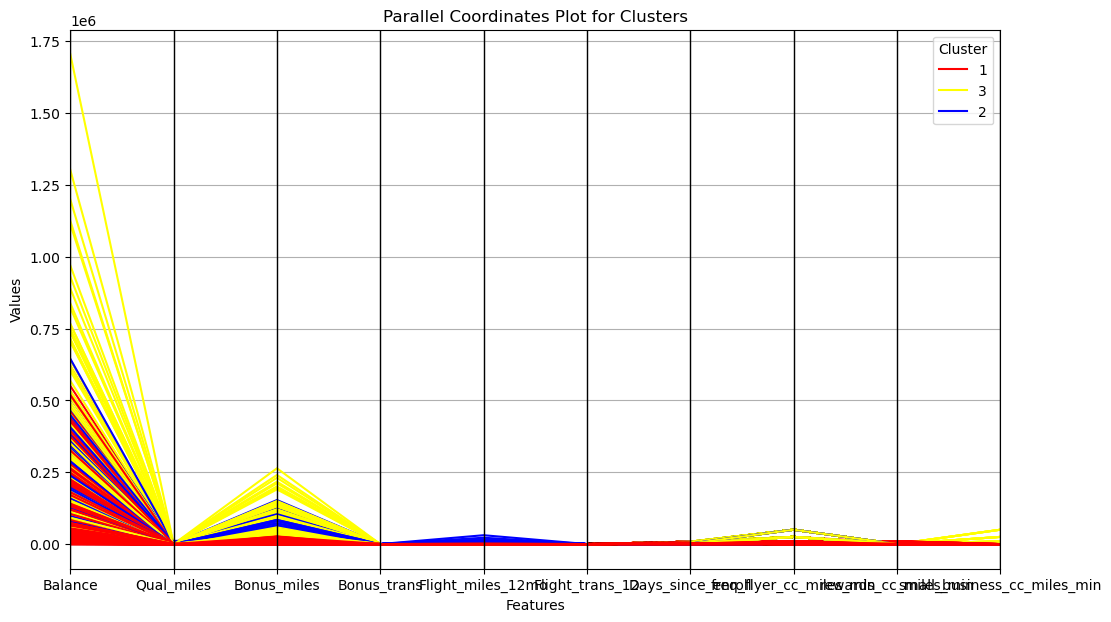

In [28]:
df['clusterH'] = df['clusterH'].astype('category')

colors = ['#FF0000', '#FFFF00', '#0000FF']

plt.figure(figsize=(12, 7))
parallel_coordinates(df, class_column='clusterH', cols=['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'freq_flyer_cc_miles_min', 'rewards_cc_miles_min', 'small_business_cc_miles_min'], color=colors)

plt.title('Parallel Coordinates Plot for Clusters')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend(title='Cluster')
plt.show()

<div class="alert alert-block alert-success"> <b>Cluster Analysis </b><br>
<strong>Cluster 1:</strong>

<li>Lowest average balance and bonus miles.</li>
<li>Least frequent flyers with minimal qualifying miles and flight transactions.</li>
<li>Members primarily earn the lowest bracket of miles from credit cards.</li>
<strong>Cluster 2:</strong>

<li>Higher average balance and significantly more bonus miles.</li>
<li>Most frequent flyers with the highest qualifying miles and flight transactions.</li>
<li>Despite having the highest credit card miles earned on average, most members still fall into the lowest earnings bracket ('A').</li>
<strong>Cluster 3:</strong>

<li>Highest average balance among all clusters.</li>
<li>High bonus miles but moderate flight frequency.</li>
<li>Longest average tenure in the frequent-flyer program.</li>
<li>Highest bracket of credit card miles earned ('D') among members who use credit cards for miles.</li>

In summary, Cluster 1 might represent less engaged or newer members, Cluster 2 appears to be the most active and frequent flyers, and Cluster 3 seems to consist of long-term members with high mileage balances who are moderately active flyers.
</div>

In [29]:
df['clusterHLabel'] = " "
df['clusterHLabel'] = np.where(df['clusterH'] == 1, "Saver Segment", df['clusterHLabel'])
df['clusterHLabel'] = np.where(df['clusterH'] == 2, "Frequent Flyers Elite", df['clusterHLabel'])
df['clusterHLabel'] = np.where(df['clusterH'] == 3, "Loyal Clientele", df['clusterHLabel'])

<div class="alert alert-block alert-success"> 
<b>H_ONE: "Saver Segment"</b> - This label reflects the cluster's high balance of miles with low recent flight activity, suggesting members save miles more than they redeem them.

<b>H_THREE: "Frequent Flyers Elite"</b> - Members in this cluster are actively flying and engaging with the airline's services, indicated by their high number of bonus miles and flight transactions.

<b>H_TWO: "Loyal Clientele" </b>- This label is fitting for long-term members with a significant balance, moderate activity, and loyalty to the frequent-flyer program.

In [30]:
df.head()

ID#  Balance  Qual_miles freq_flyer_cc_miles rewards_cc_miles  \
0    1    28143           0                   A                A   
1    2    19244           0                   A                A   
2    3    41354           0                   A                A   
3    4    14776           0                   A                A   
4    5    97752           0                   D                A   

  small_business_cc_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0                       A          174            1                  0   
1                       A          215            2                  0   
2                       A         4123            4                  0   
3                       A          500            1                  0   
4                       A        43300           26               2077   

   Flight_trans_12  Days_since_enroll Award  freq_flyer_cc_miles_min  \
0                0               7000     0                        0   
1                0               6968     0                        0   
2                0               7034     0                        0   
3                0               6952     0                        0   
4                4               6935     1                    25000   

   rewards_cc_miles_min  small_business_cc_miles_min clusterH    clusterHLabel  
0                     0                            0        1    Saver Segment  
1                     0                            0        1    Saver Segment  
2                     0                            0        1    Saver Segment  
3                     0                            0        1    Saver Segment  
4                     0                            0        3  Loyal Clientele

In [31]:
# Normalizing the dataset
# pandas use sample standard deviation
df_KNorm = (df_temp - df_temp.mean())/df_temp.std()

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_KNorm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_KNorm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(map(str,item.index)))

0 :  5, 7, 10, 12, 16, 17, 21, 29, 33, 36, 42, 44, 49, 53, 57, 60, 68, 69, 73, 74, 76, 78, 80, 81, 82, 88, 90, 95, 100, 103, 108, 111, 112, 118, 120, 124, 125, 127, 128, 129, 132, 139, 140, 146, 150, 153, 154, 155, 157, 158, 161, 164, 166, 170, 171, 172, 173, 175, 177, 178, 192, 194, 196, 200, 201, 203, 204, 207, 210, 214, 219, 222, 223, 225, 231, 233, 235, 244, 246, 248, 252, 259, 263, 272, 273, 275, 276, 281, 283, 285, 288, 289, 290, 292, 293, 294, 295, 296, 299, 300, 301, 306, 307, 309, 314, 315, 316, 317, 322, 325, 326, 332, 334, 339, 340, 341, 345, 346, 350, 352, 353, 362, 367, 374, 377, 382, 384, 387, 388, 389, 393, 394, 411, 417, 419, 428, 429, 430, 431, 433, 435, 439, 442, 443, 444, 447, 450, 452, 454, 456, 458, 459, 464, 471, 473, 478, 483, 484, 485, 487, 492, 500, 505, 507, 509, 511, 512, 516, 518, 520, 521, 523, 524, 528, 532, 533, 534, 538, 540, 543, 552, 553, 560, 568, 570, 571, 574, 578, 581, 583, 587, 594, 601, 606, 607, 608, 609, 610, 611, 616, 623, 627, 628, 629, 632, 

In [32]:
withinClusterSS = [0] * 3
clusterCount = [0] * 3
for cluster, distance in zip(kmeans.labels_, kmeans.transform(df_KNorm)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (842 members): 9724.15 within cluster
Cluster 1 (165 members): 5101.40 within cluster
Cluster 2 (2992 members): 12928.62 within cluster


<div class="alert alert-block alert-warning"> The reasoning for choosing the number of clusters, n value is explained in the later parts </div>

In [33]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_KNorm.columns)
pd.options.display.max_rows = 7
centroids

Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0  0.650922   -0.014273     1.399838     0.876184          -0.066758   
1  1.121551    0.844060     0.608121     1.632361           3.516452   
2 -0.245330   -0.042540    -0.428085    -0.336999          -0.175172   

   Flight_trans_12  Days_since_enroll  freq_flyer_cc_miles_min  \
0        -0.069094           0.427997                 1.586720   
1         3.809647           0.273750                 0.178015   
2        -0.190687          -0.135731                -0.457030   

   rewards_cc_miles_min  small_business_cc_miles_min  
0             -0.082161                     0.199871  
1              0.148053                    -0.026037  
2              0.014989                    -0.054896

Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0  0.650922   -0.014273     1.399838     0.876184          -0.066758   
1  1.121551    0.844060     0.608121     1.632361           3.516452   
2 -0.245330   -0.042540    -0.428085    -0.336999          -0.175172   

   Flight_trans_12  Days_since_enroll  freq_flyer_cc_miles_min  \
0        -0.069094           0.427997                 1.586720   
1         3.809647           0.273750                 0.178015   
2        -0.190687          -0.135731                -0.457030   

   rewards_cc_miles_min  small_business_cc_miles_min    cluster  
0             -0.082161                     0.199871  Cluster 0  
1              0.148053                    -0.026037  Cluster 1  
2              0.014989                    -0.054896  Cluster 2

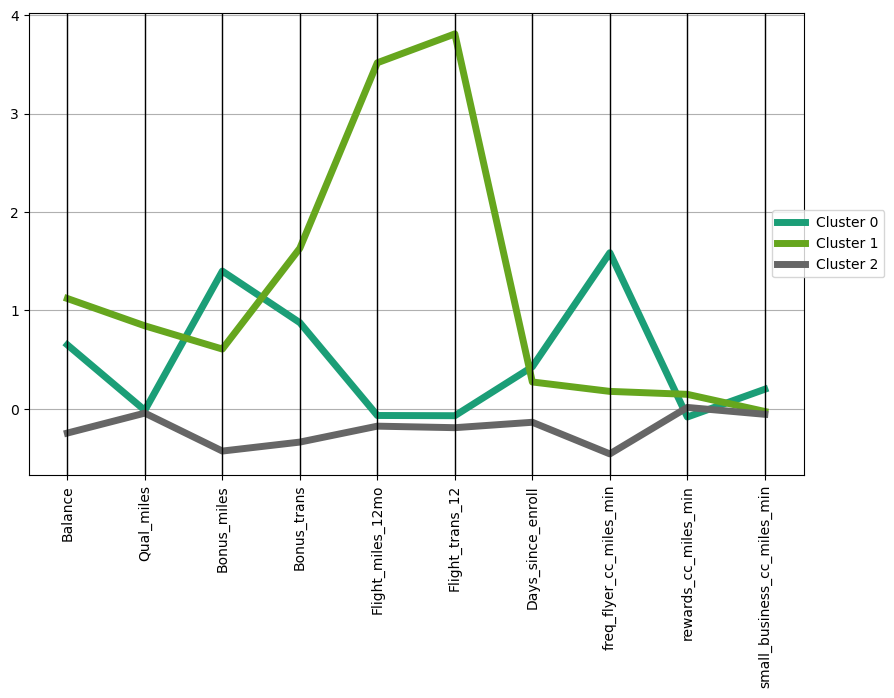

In [34]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,9.5)
plt.xticks(rotation = 90)
centroids

<div class="alert alert-block alert-warning"> This gives the summary of each cluster, indicating how many members it has and how tightly those members are grouped around the centroid. A lower WCSS value indicates a more compact cluster, where the data points are closer to the centroid.</div>


In [35]:
df_KNorm.groupby(kmeans.labels_).mean()

Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0  0.651015   -0.014068     1.400764     0.876805          -0.066447   
1  1.121551    0.844060     0.608121     1.632361           3.516452   
2 -0.245057   -0.042588    -0.427735    -0.336768          -0.175223   

   Flight_trans_12  Days_since_enroll  freq_flyer_cc_miles_min  \
0        -0.068746           0.427541                 1.588502   
1         3.809647           0.273750                 0.178015   
2        -0.190744          -0.135414                -0.456849   

   rewards_cc_miles_min  small_business_cc_miles_min  
0             -0.082142                     0.200174  
1              0.148053                    -0.026037  
2              0.014952                    -0.054897

In [36]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2
0  0.000000  5.670375  3.195743
1  5.670375  0.000000  6.150348
2  3.195743  6.150348  0.000000


In [37]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0     8.866117
1    11.820723
2     9.346091
dtype: float64

In [38]:
df['clusterK']=list(memb)
clusterSummaryK = df.groupby(['clusterK']).agg({'Balance': ['count'],
                                               'Balance': ['mean'],
                                               'Qual_miles': ['mean'],
                                               'Bonus_miles': ['mean'],
                                               'Bonus_trans': ['mean'],
                                               'Flight_miles_12mo': ['mean'],
                                               'Flight_trans_12': ['mean'],
                                               'Days_since_enroll': ['mean'],
                                               'freq_flyer_cc_miles': pd.Series.mode,
                                                'freq_flyer_cc_miles_min': ['mean'],
                                                'rewards_cc_miles': pd.Series.mode,
                                                'rewards_cc_miles_min': ['mean'],
                                                'small_business_cc_miles': pd.Series.mode,
                                                'small_business_cc_miles_min': ['mean']
                                                })

clusterSummaryK

Balance  Qual_miles   Bonus_miles Bonus_trans  \
                   mean        mean          mean        mean   
clusterK                                                        
0         139207.751781  133.230404  50974.662708   20.022565   
1         186626.327273  797.133333  31831.557576   27.278788   
2          48905.560829  111.165441   6814.628008    8.367647   

         Flight_miles_12mo Flight_trans_12 Days_since_enroll  \
                      mean            mean              mean   
clusterK                                                       
0               367.016627        1.112827       5001.488124   
1              5383.824242       15.824242       4683.890909   
2               214.707219        0.650067       3838.911765   

         freq_flyer_cc_miles freq_flyer_cc_miles_min rewards_cc_miles  \
                        mode                    mean             mode   
clusterK                                                                
0                          D            31365.795724                A   
1                          A            11303.030303                A   
2                          A             2272.727273                A   

         rewards_cc_miles_min small_business_cc_miles  \
                         mean                    mode   
clusterK                                                
0                   11.876485                       A   
1                  181.818182                       A   
2                   83.556150                       A   

         small_business_cc_miles_min  
                                mean  
clusterK                              
0                         522.565321  
1                          60.606061  
2                           1.671123

In [39]:
df['clusterKLabel']=""
df['clusterKLabel'] = np.where(df['clusterK'] ==0 , "Silent Accumulators",df['clusterKLabel'])
df['clusterKLabel'] = np.where(df['clusterK'] ==1 , "Sky High Club",df['clusterKLabel'])
df['clusterKLabel'] = np.where(df['clusterK'] ==2 , "Aspiring Travelers",df['clusterKLabel'])

<div class="alert alert-block alert-success">
<b>K_ONE: "Silent Accumulators" </b>- This cluster seems to accumulate miles (evidenced by their high balances) but does not frequently fly, suggesting they might be earning through credit card purchases or other means.

<b>K_TWO: "Sky High Club"</b> - Members of this cluster have the highest flight miles and transactions, indicating they are the most frequent flyers, possibly including business travelers and globetrotters.

<b>K_THREE: "Aspiring Travelers"</b> - Members of this cluster have moderate balances and are potentially looking to increase their flying frequency.
</div>

<div class="alert alert-block alert-success"> <b>Centroids vs. Cluster summary:</b><br>
Centroids are computed based on normalized distance, and you can calculate cluster summaries by reversing the normalization process. You should multiply centroids by the standard deviation of each feature and add the feature's mean to the multiplication.<br>
<strong>Cluster 0:</strong>

<li><strong>Centroid:</strong> This cluster's centroid indicates moderate to high values for 'Balance', 'Bonus_miles', 'Bonus_trans', and 'Days_since_enroll'.</li>
<br><li><strong>Cluster Summary:</strong> The mean values for this cluster confirm the centroid's characteristics. Members have high 'Balance', 'Bonus_miles', and 'Bonus_trans'. They also have the highest average 'Days_since_enroll'. Most members earn miles through credit cards ('freq_flyer_cc_miles' mode is 'D') and have high values for 'freq_flyer_cc_miles_min'.</li><br>
<strong>Cluster 1:</strong>

<li><strong>Centroid:</strong> This cluster's centroid indicates significantly higher values for all features compared to other clusters.</li>
<br><li><strong>Cluster Summary:</strong> The mean values for this cluster confirm the centroid's characteristics. Members have the highest 'Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', and 'Flight_trans_12'. They also have the highest average 'Days_since_enroll'. Most members earn miles through credit cards ('freq_flyer_cc_miles' mode is 'A') and have high values for 'freq_flyer_cc_miles_min'.</li><br>
<strong>Cluster 2:</strong>

<li><strong>Centroid:</strong> This cluster's centroid indicates the lowest values for all features compared to other clusters.</li>
<br><li><strong>Cluster Summary:</strong> The mean values for this cluster confirm the centroid's characteristics. Members have the lowest 'Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', and 'Flight_trans_12'. They also have the lowest average 'Days_since_enroll'. Most members earn miles through credit cards ('freq_flyer_cc_miles' mode is 'A') and have low values for 'freq_flyer_cc_miles_min'.</li><br>
Overall, the centroids and cluster summaries align well, demonstrating the characteristics of each cluster based on the average values of the features.
</div>

In [40]:
(centroids*df_temp.std())+df_temp.mean()

Balance   Bonus_miles  Bonus_trans  Days_since_enroll  \
0  139198.378410  50952.290629    20.016607        5002.431791   
1  186626.327273  31831.557576    27.278788        4683.890909   
2   48878.011367   6806.169174     8.365430        3838.257105   

   Flight_miles_12mo  Flight_trans_12  Qual_miles cluster  \
0         366.581257         1.111507  133.072361     NaN   
1        5383.824242        15.824242  797.133333     NaN   
2         214.779004         0.650284  111.202608     NaN   

   freq_flyer_cc_miles_min  rewards_cc_miles_min  small_business_cc_miles_min  
0             31340.450771             11.862396                   521.945433  
1             11303.030303            181.818182                    60.606061  
2              2270.143765             83.584086                     1.671682

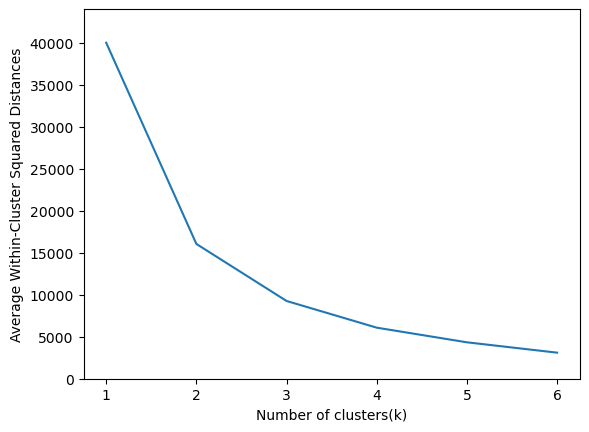

In [41]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_KNorm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()


<div class="alert alert-block alert-success"> <b>Optimum number of clusters</b><br>
    
<br>In this dataset, it is concluded that 3 is the "optimal" number as the curve breaks (or bends last) and K=4 (or above) does not significantly improve the target function.<br>
<b>The optimal number of clusters is 3, provides a relatively low average. Although increasing cluster provides a even smaller average, the incremental reduction is not worth increasing the size/complexity of the model.<b>
</div>


In [42]:
clusterSummaryHK = df.groupby(['clusterHLabel','clusterKLabel']).agg({'clusterKLabel': ['count'],
                                               'Balance': ['mean'],
                                               'Qual_miles': ['mean'],
                                               'Bonus_miles': ['mean'],
                                               'Bonus_trans': ['mean'],
                                               'Flight_miles_12mo': ['mean'],
                                               'Flight_trans_12': ['mean'],
                                               'Days_since_enroll': ['mean'],
                                               'freq_flyer_cc_miles': pd.Series.mode,
                                                'freq_flyer_cc_miles_min': ['mean'],
                                                'rewards_cc_miles': pd.Series.mode,
                                                'rewards_cc_miles_min': ['mean'],
                                                'small_business_cc_miles': pd.Series.mode,
                                                'small_business_cc_miles_min': ['mean']
                                                })
pd.set_option('display.max_rows', 10)
clusterSummaryHK.head(9)

clusterKLabel        Balance  \
                                                  count           mean   
clusterHLabel         clusterKLabel                                      
Frequent Flyers Elite Aspiring Travelers            109   77968.247706   
                      Silent Accumulators            33  125779.393939   
                      Sky High Club                 151  142947.543046   
Loyal Clientele       Aspiring Travelers              4   25859.500000   
                      Silent Accumulators           749  136607.759680   
                      Sky High Club                   9  873856.000000   
Saver Segment         Aspiring Travelers           2879   47837.256339   
                      Silent Accumulators            60  179049.916667   
                      Sky High Club                   5  268712.200000   

                                            Qual_miles   Bonus_miles  \
                                                  mean          mean   
clusterHLabel         clusterKLabel                                    
Frequent Flyers Elite Aspiring Travelers   1532.247706   8637.770642   
                      Silent Accumulators  1624.000000  45611.333333   
                      Sky High Club         769.079470  30297.933775   
Loyal Clientele       Aspiring Travelers      0.000000  27160.000000   
                      Silent Accumulators    66.667557  53222.807744   
                      Sky High Club        1209.777778  59866.666667   
Saver Segment         Aspiring Travelers     57.517193   6717.335881   
                      Silent Accumulators   144.233333  25860.150000   
                      Sky High Club         901.600000  27683.800000   

                                          Bonus_trans Flight_miles_12mo  \
                                                 mean              mean   
clusterHLabel         clusterKLabel                                       
Frequent Flyers Elite Aspiring Travelers     9.862385       2075.458716   
                      Silent Accumulators   30.848485       1656.424242   
                      Sky High Club         26.867550       5563.079470   
Loyal Clientele       Aspiring Travelers    12.750000         25.000000   
                      Silent Accumulators   19.291055        319.496662   
                      Sky High Club         30.888889       3351.777778   
Saver Segment         Aspiring Travelers     8.304967        144.522056   
                      Silent Accumulators   23.200000        251.050000   
                      Sky High Club         33.200000       3628.000000   

                                          Flight_trans_12 Days_since_enroll  \
                                                     mean              mean   
clusterHLabel         clusterKLabel                                           
Frequent Flyers Elite Aspiring Travelers         5.045872       3362.816514   
                      Silent Accumulators        5.393939       4897.636364   
                      Sky High Club             16.019868       4528.410596   
Loyal Clientele       Aspiring Travelers         0.250000       1956.000000   
                      Silent Accumulators        0.957276       4934.228304   
                      Sky High Club             13.666667       7642.444444   
Saver Segment         Aspiring Travelers         0.484196       3859.552970   
                      Silent Accumulators        0.700000       5898.233333   
                      Sky High Club             13.800000       4054.000000   

                                                                         freq_flyer_cc_miles  \
                                                                                        mode   
clusterHLabel         clusterKLabel                                                            
Frequent Flyers Elite Aspiring Travelers                                                   A   
                      Silent Accumulators             

<div class="alert alert-block alert-success"> <b>Similarities between heirarchical and K-Means clustering</b> <br><br>
Hierarchical Clustering tends to create clusters with more nuanced overlaps between passenger characteristics, reflecting a detailed view of customer behaviors and preferences.<br>

K-Means Clustering produces more distinct, clearly defined clusters, indicating it is effective for identifying broader customer segments with specific, common attributes.<br>

Similarities include both methods identifying high-value customer segments based on Balance and Bonus_miles.<br>

Differences are primarily in granularity and overlap of clusters; Hierarchical clustering shows more overlap and granularity in passenger behaviors, while K-Means focuses on distinct segmentation.<br>

K-Means clusters tend to have clear differentiation based on mileage factors, while Hierarchical clusters provide a more granular view, with overlaps observed in some K-Means clusters spread across multiple Hierarchical clusters. <br>

Overall, both clustering approaches provide valuable insights but from different perspectives: K-Means for broad segmentation and Hierarchical for detailed, nuanced customer behavior analysis.
</div>




<div class="alert alert-block alert-success">  As mentioned earlier, the number of categories for linkage in different hierarchical clustering methods—such as single, complete, Ward, average, and centroid—varies in their approach to categorizing clusters. Among these, Ward's method most closely aligns with the K-Means algorithm regarding the number of clusters formed i.e. 3 for both the cases. This similarity is due to Ward's method's objective to minimize the variance within each cluster, paralleling the K-Means goal of minimizing the within-cluster sum of squares. By focusing on reducing internal variance, Ward's method typically generates clusters that are both compact and uniform in size, traits that are commonly associated with K-Means clustering outcomes.</div>

# Recommendations 

<div class="alert alert-block alert-success">
<b>Sky High Club:</b> This cluster is characterized by very high average balances and flight miles, with 873,856 miles and 3,351 flight miles respectively, suggesting these are the airline's most active and potentially lucrative customers. They also have a high number of transactions (30.88 bonus transactions and 13.66 flight transactions), indicating strong engagement with the program. Incentives for this group could include exclusive experiences or loyalty status upgrades, aiming to retain these top-tier customers and encourage even more frequent engagement.<br>

<b>Silent Accumulators:</b> With an average balance of 179,049 miles, members in this cluster have a significant number of miles but low flight activity, indicating they may be accruing miles through other means such as credit card spending. Offering them incentives to use their miles, such as special redemption rates for flights or upgrades, could encourage them to start using their stockpiled miles for travel.<br>

<b>Frequent Flyers Elite:</b> This cluster has a good balance of 77,968 miles on average and a notably high number of qual_miles and bonus miles, which suggests they are frequent travelers but not necessarily the most engaged with the airline's frequent-flyer program. Offering them incentives that reward booking behavior, such as bonus miles for additional flights booked within a certain period, could boost their loyalty to the airline.<br>

<b>Loyal Clientele:</b> This group has a lower average balance and flight miles but has been enrolled for a significant amount of time (an average of 1,956 days since enrollment). They may be occasional flyers who consistently choose the same airline. Incentives such as exclusive discounts or bonus miles for their next trip could stimulate additional bookings from this reliable customer base.<br>

<b>Saver Segment:</b> Despite having a moderate balance of miles, this cluster shows very low flight activity. This could indicate a segment of customers who are saving miles for a big trip or may not be aware of the potential value of their miles. Targeting them with limited-time offers that increase the value of miles spent on flights or upgrades could motivate them to redeem their miles sooner.<br>

Each selected cluster is targeted based on their specific behaviors and engagement levels with the airline's frequent-flyer program, with the goal of increasing flight activity, encouraging the use of accrued miles, and enhancing overall customer loyalty and revenue.<br>
</div>

<div class="alert alert-block alert-success">
For the <b>Sky High Club</b>, with their high engagement and balances, we could introduce a tiered incentive structure. The first offer could be an instant upgrade to the next loyalty tier, providing immediate gratification and a sense of exclusivity. Secondly, we could offer additional bonus miles for international flights to encourage further long-haul travel. Finally, an exclusive event invitation, such as a VIP airport lounge opening, could personalize their experience with the brand.<br>

The <b>Silent Accumulators</b> might appreciate offers that incentivize mile redemption to stimulate travel. The first offer could be a "Miles Match" program, where the airline matches a percentage of miles redeemed for tickets or upgrades, effectively doubling their spending power. Secondly, a "Miles for Merchandise" offer would allow members to redeem miles for high-quality goods or gift cards, diversifying the utility of their mile stockpile. Lastly, a limited-time offer providing significant discounts on flights booked with miles could encourage these savers to become spenders.<br>

For the <b>Frequent Flyers Elite</b>, tailored offers could enhance their travel and elevate their status. A "Fast Track Elite" challenge that accelerates their advance to a higher membership level with additional benefits could be attractive. Secondly, offering exclusive discounts on flights or services could recognize their current loyalty and secure future business. Lastly, providing complimentary access to travel comforts, such as spa services at select airports, would acknowledge their value to the airline.<br>

The <b>Loyal Clientele</b> cluster, distinguished by long-term membership, might respond well to appreciation-focused incentives. The first could be an anniversary bonus, rewarding members with extra miles on the anniversary of their enrollment. Another offer could be a "Bring a Companion" voucher, allowing them to book a flight for a companion at a reduced rate or for free on their next booking, thereby recognizing and rewarding their loyalty. Lastly, providing exclusive early access to new routes or services would make them feel valued and could lead to increased engagement.<br>

Lastly, the <b>Saver Segment</b> could benefit from offers that encourage the use of miles for more immediate gratification. A "Redeem and Receive" offer that gives a bonus gift card for a popular retailer with a certain level of miles redeemed could be compelling. Additionally, a "Double Up" offer that provides double the miles on their next flight if they book within a certain window could jump-start their travel activity. Lastly, a series of flash sales on mile redemption for seat upgrades or extra baggage could provide an incentive to use miles in a way that enhances their travel experience.<br>
</div>